# Streamlit Dev

- 02/26/24
> Update app code to load filtered top 100 common foods as a starting point.

## SAVE CONTENT

In [74]:
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
import pandas as pd

pd.set_option('display.max_columns',100)


##Load in the data
import json
with open("config/filepaths.json") as f:
    FPATHS = json.load(f)

In [76]:
df = pd.read_csv(FPATHS['data']['subset']['reviews-subset_most-commonly-reviewed_csv'])
df

asin      reviewerID  \
0       B0001ES9FI  A1F07TCKQT2C50   
1       B0001ES9FI  A19U7XR8BCVGBN   
2       B0001ES9FI  A1R9ENDDUT7CM0   
3       B0001ES9FI  A13A105B1M45W4   
4       B0001ES9FI  A23ZRFLO4FCVXE   
...            ...             ...   
708700  B00ZEA5ESY   AVQMXBMSO11L4   
708701  B00ZEA5ESY  A328LC0UXY12DC   
708702  B00ZEA5ESY  A3OMMZ22V7Q8SD   
708703  B00ZEA5ESY  A338LPLJX279CD   
708704  B00ZEA5ESY  A3VJ02M1NLFYHE   

                                               reviewText  \
0       I just got the senseo coffee machine and it ca...   
1       I have had my Senseo for a little over a week....   
2       This coffee machine is probably the best coffe...   
3       I've had my Senseo for about 2 months and love...   
4       What more can be said? Good, clean, full bodie...   
...                                                   ...   
708700  I received a Savor box as a gift for my first ...   
708701                                        Delicious!!   
708702                         Tasty energy packed treat.   
708703                           so delicious I love them   
708704                          Great taste, great price.   

                                    summary  overall  year  \
0                 Dark roast is my favorite      4.0  2004   
1       Great Cup of Coffee - Less Caffeine      4.0  2004   
2                Don't Purchase from Target      5.0  2004   
3                            Awesome Coffee      5.0  2004   
4                               Good coffee      5.0  2004   
...                                     ...      ...   ...   
708700  Beautiful and high quality keepsake      5.0  2018   
708701                                Yummy      5.0  2018   
708702                                tasty      5.0  2018   
708703                                  yum      5.0  2018   
708704             Great taste, great price      5.0  2018   

                                                    title   brand  \
0       Senseo Dark Roast Coffee Pods, 4.41 Ounce, 18-...  Senseo   
1       Senseo Dark Roast Coffee Pods, 4.41 Ounce, 18-...  Senseo   
2       Senseo Dark Roast Coffee Pods, 4.41 Ounce, 18-...  Senseo   
3       Senseo Dark Roast Coffee Pods, 4.41 Ounce, 18-...  Senseo   
4       Senseo Dark Roast Coffee Pods, 4.41 Ounce, 18-...  Senseo   
...                                                   ...     ...   
708700  KIND Bars, Caramel Almond and Sea Salt, Gluten...    KIND   
708701  KIND Bars, Caramel Almond and Sea Salt, Gluten...    KIND   
708702  KIND Bars, Caramel Almond and Sea Salt, Gluten...    KIND   
708703  KIND Bars, Caramel Almond and Sea Salt, Gluten...    KIND   
708704  KIND Bars, Caramel Almond and Sea Salt, Gluten...    KIND   

                                                 category  
0       Grocery & Gourmet Food; Beverages; Coffee, Tea...  
1       Grocery & Gourmet Food; Beverages; Coffee, Tea...  
2       Grocery & Gourmet Food; Beverages; Coffee, Tea...  
3       Grocery & Gourmet Food; Beverages; Coffee, Tea...  
4       Grocery & Gourmet Food; Beverages; Coffee, Tea...  
...                                                   ...  
708700  Grocery & Gourmet Food; Snack Foods; Bars; Nut...  
708701  Grocery & Gourmet Food; Snack Foods; Bars; Nut...  
708702  Grocery & Gourmet Food; Snack Foods; Bars; Nut...  
708703  Grocery & Gourmet Food; Snack Foods; Bars; Nut...  
708704  Grocery & Gourmet Food; Snack Foods; Bars; Nut...  

[708705 rows x 9 columns]

In [77]:
meta_df = pd.read_csv(FPATHS['data']['subset']['metadata_csv'])
meta_df#.head()

asin                                           category  \
0    B00BUKL666  Grocery & Gourmet Food; Snack Foods; Bars; Nut...   
1    B008QMX2SG  Grocery & Gourmet Food; Snack Foods; Bars; Nut...   
2    B00D3M2QP4  Grocery & Gourmet Food; Breakfast Foods; Break...   
3    B00542YXFW  Grocery & Gourmet Food; Beverages; Coffee, Tea...   
4    B000F4DKAI  Grocery & Gourmet Food; Beverages; Coffee, Tea...   
..          ...                                                ...   
528  B00250M2ZY   Grocery & Gourmet Food; Candy & Chocolate; Mints   
529  B006E9PPCE  Grocery & Gourmet Food; Beverages; Coffee, Tea...   
530  B00I6R0KLS  Grocery & Gourmet Food; Beverages; Coffee, Tea...   
531  B000BW5FMU  Grocery & Gourmet Food; Candy & Chocolate; Cho...   
532  B005GXQ244  Grocery & Gourmet Food; Candy & Chocolate; Gin...   

                                           description  \
0    'These bars are where our journey started and ...   
1    'These bars are where our journey started and ...   
2    'These bars are where our journey started and ...   
3    'Mild, but round and full licorice flavor and ...   
4    'First started as much needed refreshment betw...   
..                                                 ...   
528  "Get a tub of 290 pieces of Bob's Sweet Stripe...   
529  'Founded in 1972, Stash Tea Company originally...   
530                                                NaN   
531  'Belgium has a long tradition in chocolate mas...   
532  "The Ginger People, Bruce and Abbie Leeson, ha...   

                                                 title              brand  \
0    KIND Bars, Dark Chocolate Nuts &amp; Sea Salt,...               KIND   
1    Kind Bars, Madagascar Vanilla Almond, Gluten F...               KIND   
2    KIND Bars, Dark Chocolate Chili Almond, Gluten...               KIND   
3        Davidson's Tea Bulk, Anise Seed, 16-Ounce Bag     Davidson's Tea   
4    Twinings of London English Afternoon Black Tea...           Twinings   
..                                                 ...                ...   
528  Bobs Sweet Stripes Soft Peppermint Balls (51 O...               Bobs   
529  Stash Tea Gunpowder Green Loose Leaf Tea, 16 O...          Stash Tea   
530  Beantown Roasters K-Cup Variety Pack made up o...  Beantown Roasters   
531  Donckels Cocoa Dusted Belgian Chocolate Truffl...           Donckels   
532       Ginger People Original Ginger Chews, 1lb Bag  The Ginger People   

    feature                                 rank main_cat   price  \
0       NaN       18 in Grocery & Gourmet Food (  Grocery  $13.67   
1       NaN    2,949 in Grocery & Gourmet Food (  Grocery  $14.79   
2       NaN    4,575 in Grocery & Gourmet Food (  Grocery  $15.53   
3       NaN  100,853 in Grocery & Gourmet Food (  Grocery  $15.00   
4       NaN   19,796 in Grocery & Gourmet Food (  Grocery  $23.70   
..      ...                                  ...      ...     ...   
528     NaN    4,765 in Grocery & Gourmet Food (  Grocery  $18.71   
529     NaN   78,360 in Grocery & Gourmet Food (  Grocery  $13.99   
530     NaN   46,461 in Grocery & Gourmet Food (  Grocery  $39.80   
531     NaN   10,489 in Grocery & Gourmet Food (  Grocery  $20.64   
532     NaN   10,222 in Grocery & Gourmet Food (  Grocery  $13.89   

                                              imageURL  \
0    'https://images-na.ssl-images-amazon.com/image...   
1    'https://images-na.ssl-images-amazon.com/image...   
2    'https://images-na.ssl-images-amazon.com/image...   
3    'https://images-na.ssl-images-amazon.com/image...   
4    'https://images-na.ssl-images-amazon.com/image...   
..                                                 ...   
528  'https://images-na.ssl-images-amazon.com/image...   
529  'https://images-na.ssl-images-amazon.com/image...   
530                                                NaN   
531  'https://images-na.ssl-images-amazon.com/image...   
532  'https://images-na.ssl-images-amazon.com/image...   

                      

### Selecting a Brand

In [78]:
df.nunique()

asin             533
reviewerID    523377
reviewText    570600
summary       305234
overall            5
year              15
title            524
brand            341
category         176
dtype: int64

In [79]:
brands = df['brand'].unique()
len(brands)

342

In [80]:
brand_counts = df['brand'].value_counts()
brand_counts

KIND              37482
Twinings          22957
Viva Naturals     16824
Nutiva            13807
Planters          12265
                  ...  
Aroy-D              441
Donckels            424
Vital Proteins      423
See's Candies       411
Bobs                392
Name: brand, Length: 341, dtype: int64

In [81]:
brand_counts.head(50)

KIND                              37482
Twinings                          22957
Viva Naturals                     16824
Nutiva                            13807
Planters                          12265
Davidson's Tea                    10376
Healthworks                       10258
Death Wish Coffee Co.              8103
Green Mountain Coffee Roasters     7933
Crazy Cups                         7919
Caza Trail                         7719
SAN FRANCISCO BAY                  7685
Terrasoul Superfoods               7309
Keurig                             7103
Haribo                             7054
Stur                               7027
Celestial Seasonings               7007
Yogi                               6687
Eight O'Clock Coffee               6493
YumEarth                           6378
Brooklyn Beans                     5933
Lindt                              5708
Starbucks                          5626
Jelly Belly                        5604
Torani                             5518


In [82]:
product_names = df['title'].unique()
len(product_names)

524

> Select by brand

In [83]:
selected_brand = "Lipton" # Dropdown list or type-to filter list?
selected_df = df.loc[df['brand'] == selected_brand]
selected_df

asin      reviewerID  \
78737   B00099XK6I   ACRPF548KAR3B   
78738   B00099XK6I  A2TBUQDGDDG0VY   
78739   B00099XK6I  A26OZ09NYHAYXP   
78740   B00099XK6I  A2JOAZJMVR2JI5   
78741   B00099XK6I  A2PLHV5F0GLVU9   
...            ...             ...   
415596  B00C7MGHWE  A2Y4CMG2Z6R05Y   
415597  B00C7MGHWE  A1LHBAUOLQ8DO4   
415598  B00C7MGHWE  A3PU8B5BDVC5RI   
415599  B00C7MGHWE   AWXWY3KTKIDWG   
415600  B00C7MGHWE  A2SDUPEWOPANTQ   

                                               reviewText  \
78737   I have tried many brands of decaffeinated tea,...   
78738   This is a good buy after you add the extra ten...   
78739   I drink plain iced tea every day - I love wate...   
78740   These are standard Lipton tea bags, like at th...   
78741   Excellent service ... excellent product ... an...   
...                                                   ...   
415596                                       Tastes great   
415597                                       tastes great   
415598  AH! I forgot how much I loved this Sweet Tea!\...   
415599  i thought I was getting just green tea but ins...   
415600       Need a larger offering. 88 ct.would be nice.   

                                                  summary  overall  year  \
78737                            Lipton Decaffeinated tea      5.0  2007   
78738                                            Good buy      4.0  2007   
78739                                 Nice mild daily tea      4.0  2007   
78740                                            Good buy      3.0  2008   
78741                                    Lipton Decaf Tea      5.0  2008   
...                                                   ...      ...   ...   
415596                                         Five Stars      5.0  2018   
415597                                         Five Stars      5.0  2018   
415598  Brew over ice, along with some frozen fruit......      5.0  2018   
415599                                          Two Stars      2.0  2018   
415600                                     would be nice.      3.0  2018   

                                                  title   brand  \
78737   Lipton Black Tea Bags, 100% Natural Tea, 100 ct  Lipton   
78738   Lipton Black Tea Bags, 100% Natural Tea, 100 ct  Lipton   
78739   Lipton Black Tea Bags, 100% Natural Tea, 100 ct  Lipton   
78740   Lipton Black Tea Bags, 100% Natural Tea, 100 ct  Lipton   
78741   Lipton Black Tea Bags, 100% Natural Tea, 100 ct  Lipton   
...                                                 ...     ...   
415596      Lipton K-Cups, Refresh Iced Sweet Tea 22 ct  Lipton   
415597      Lipton K-Cups, Refresh Iced Sweet Tea 22 ct  Lipton   
415598      Lipton K-Cups, Refresh Iced Sweet Tea 22 ct  Lipton   
415599      Lipton K-Cups, Refresh Iced Sweet Tea 22 ct  Lipton   
415600      Lipton K-Cups, Refresh Iced Sweet Tea 22 ct  Lipton   

                                                 category  
78737   Grocery & Gourmet Food; Beverages; Coffee, Tea...  
78738   Grocery & Gourmet Food; Beverages; Coffee, Tea...  
78739   Grocery & Gourmet Food; Beverages; Coffee, Tea...  
78740   Grocery & Gourmet Food; Beverages; Coffee, Tea...  
78741   Grocery & Gourmet Food; Beverages; Coffee, Tea...  
...                                                   ...  
415596  Grocery & Gourmet Food; Beverages; Coffee, Tea...  
415597  Grocery & Gourmet Food; Beverages; Coffee, Tea...  
415598  Grocery & Gourmet Food; Beverages; Coffee, Tea...  
415599  Grocery & Gourmet Food; Beverages; Coffee, Tea...  
415600  Grocery & Gourmet Food; Beverages; Coffee, Tea...  

[3482 rows x 9 columns]

In [84]:
selected_df['title'].value_counts()

Lipton Black Tea Bags, 100% Natural Tea, 100 ct                           1017
Lipton K-Cups, Refresh Iced Sweet Tea 22 ct                                848
Lipton Green Tea Bags, Orange Passionfruit Jasmine, 20 ct (Pack of 6)      650
Lipton Iced Tea Mix, Diet Decaffeinated Lemon 10 qt (Pack of 4)            484
Lipton Black Iced Tea Mix, Diet Decaffeinated Lemon, 10 qt (pack of 6)     483
Name: title, dtype: int64

In [85]:
# Filter for only products in the reivews
selected_asins = selected_df['asin'].unique()
product_metadata = meta_df[meta_df['asin'].isin(selected_asins)]
# product_metadata = product_metadata.rename({'category_list':'categories'},axis=1)

product_metadata = product_metadata.reset_index(drop=True)
product_metadata

asin                                           category  \
0  B00099XK6I  Grocery & Gourmet Food; Beverages; Coffee, Tea...   
1  B00C7MGHWE  Grocery & Gourmet Food; Beverages; Coffee, Tea...   
2  B000EM6PG2  Grocery & Gourmet Food; Beverages; Coffee, Tea...   
3  B004M8TKA2  Grocery & Gourmet Food; Beverages; Coffee, Tea...   
4  B000HBMBYU  Grocery & Gourmet Food; Beverages; Coffee, Tea...   

                                         description  \
0  'Our Master Blenders have crafted a delicious ...   
1  'Take a moment to recharge with Lipton Refresh...   
2  'Lipton Orange Passionfruit Jasmine Green Tea ...   
3  'Warning text: Phenylketonurics: Contains Phen...   
4  'Liptons expert mixologists have crafted a del...   

                                               title   brand  \
0    Lipton Black Tea Bags, 100% Natural Tea, 100 ct  Lipton   
1        Lipton K-Cups, Refresh Iced Sweet Tea 22 ct  Lipton   
2  Lipton Green Tea Bags, Orange Passionfruit Jas...  Lipton   
3  Lipton Iced Tea Mix, Diet Decaffeinated Lemon ...  Lipton   
4  Lipton Black Iced Tea Mix, Diet Decaffeinated ...  Lipton   

                                             feature  \
0  '<span class="a-size-base a-color-secondary">\...   
1  '<span class="a-size-base a-color-secondary">\...   
2  '<span class="a-size-base a-color-secondary">\...   
3                                                NaN   
4                                                NaN   

                                 rank main_cat   price  \
0                                  []  Grocery     NaN   
1  25,758 in Grocery & Gourmet Food (  Grocery  $19.99   
2  10,842 in Grocery & Gourmet Food (  Grocery  $13.05   
3   5,284 in Grocery & Gourmet Food (  Grocery  $15.51   
4  61,451 in Grocery & Gourmet Food (  Grocery     NaN   

                                            imageURL  \
0  'https://images-na.ssl-images-amazon.com/image...   
1  'https://images-na.ssl-images-amazon.com/image...   
2  'https://images-na.ssl-images-amazon.com/image...   
3  'https://images-na.ssl-images-amazon.com/image...   
4  'https://images-na.ssl-images-amazon.com/image...   

                                     imageURLHighRes  \
0  'https://images-na.ssl-images-amazon.com/image...   
1  'https://images-na.ssl-images-amazon.com/image...   
2  'https://images-na.ssl-images-amazon.com/image...   
3  'https://images-na.ssl-images-amazon.com/image...   
4  'https://images-na.ssl-images-amazon.com/image...   

                                             details  Category_Beverages  \
0  {'\\n    Product Dimensions: \\n    ': '7.9 x ...                   1   
1  {'\\n    Product Dimensions: \\n    ': '6.2 x ...                   1   
2  {'\\n    Product Dimensions: \\n    ': '12 x 6...                   1   
3  {'Shipping Weight:': '2.8 pounds (', 'ASIN: ':...                   1   
4  {'\\n    Product Dimensions: \\n    ': '12.4 x...                   1   

   Category_Bottled Beverages, Water & Drink Mixes  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Category_Candy & Chocolate  Category_Canned, Jarred & Packaged Foods  \
0                           0                                         0   
1                           0                                         0   
2                           0                                         0   
3                           0                                         0   
4                           0                                         0   

   Category_Coffee  Category_Coffee, Tea & Cocoa  Category_Cooking & Baking  \
0                0                             1                          0   
1                0                             1                          0   
2                0                             1

In [86]:
# product_counts = df['title'].value_counts()
# product_counts.head(50)

In [87]:
# import joblib
# df = joblib.load(FPATHS['data']['processed-nlp']['processed-reviews-with-target_joblib'])
# df

### Attempting to Get Images 

In [88]:
product_metadata.loc[0,'title']

'Lipton Black Tea Bags, 100% Natural Tea, 100 ct'

In [89]:
import ast

for col in ['imageURL','imageURLHighRes','category_list']:
    product_metadata[col] = product_metadata[col].map(ast.literal_eval)

In [90]:
# Saving series for easy slicing for dictionary
# product = product_metadata.loc[0]
product = product.rename({'category_list':'categories'},axis=0)
product

asin                                                                                      B00099XK6I
category                                           Grocery & Gourmet Food; Beverages; Coffee, Tea...
description                                        'Our Master Blenders have crafted a delicious ...
title                                                Lipton Black Tea Bags, 100% Natural Tea, 100 ct
brand                                                                                         Lipton
feature                                            '<span class="a-size-base a-color-secondary">\...
rank                                                                                              []
main_cat                                                                                     Grocery
price                                                                                            NaN
imageURL                                           (https://images-na.ssl-images-amazon.com

In [91]:
# img_urls = product_metadata.loc[0, 'imageURL']
img_urls = product['imageURL']
img_urls

('https://images-na.ssl-images-amazon.com/images/I/51wErhY9FUL._SS40_.jpg',
 'https://images-na.ssl-images-amazon.com/images/I/41l%2BhgsqVgL._SS40_.jpg',
 'https://images-na.ssl-images-amazon.com/images/I/51ga0WxsnlL._SS40_.jpg',
 'https://images-na.ssl-images-amazon.com/images/I/41iE9Ypt98L._SS40_.jpg',
 'https://images-na.ssl-images-amazon.com/images/I/51WgUeQgRoL._SS40_.jpg',
 'https://images-na.ssl-images-amazon.com/images/I/31Hy0dDsanL._SS40_.jpg')

In [92]:
from PIL import Image
from IPython.display import HTML, Markdown
# Image.open(img_urls[0])
image_links = []
for url in img_urls:
    image_links.append(f"<img src='{url}'>")

In [93]:
HTML(" ".join(image_links))

In [94]:
# img_urls_hd = product_metadata.loc[0, 'imageURLHighRes']
img_urls_hd = product['imageURLHighRes']
img_urls_hd

('https://images-na.ssl-images-amazon.com/images/I/51wErhY9FUL.jpg',
 'https://images-na.ssl-images-amazon.com/images/I/41l%2BhgsqVgL.jpg',
 'https://images-na.ssl-images-amazon.com/images/I/51ga0WxsnlL.jpg',
 'https://images-na.ssl-images-amazon.com/images/I/41iE9Ypt98L.jpg',
 'https://images-na.ssl-images-amazon.com/images/I/51WgUeQgRoL.jpg',
 'https://images-na.ssl-images-amazon.com/images/I/31Hy0dDsanL.jpg')

> Don't save the images ahead of time for this version of the app. 

In [95]:
# # Create subfolder for images
# import os
# img_folder = "images/selected-products/"
# os.makedirs(img_folder, exist_ok=True)

# url = img_urls_hd[0]
# fname = img_folder + os.path.basename(url)
# fname

In [96]:
# import requests

# url = img_urls_hd[0]
# resp = requests.get(url)
# resp

In [97]:
# from PIL import Image

In [98]:
# # Save HD images image 
# product_img_files = []
# for i, url in enumerate(img_urls_hd):
#     resp = requests.get(url)
#     fname = img_folder + os.path.basename(url)
    
#     with open(fname, 'wb') as f:
#         f.write(resp.content)

#     # save fname for metadata dict
#     product_img_files.append(fname)

#     print("="*80, f"- {i}) Filename = {fname}",
#          "="*80, sep='\n')
#     test_img = Image.open(fname)
#     display(test_img)

    

In [99]:
# img_url_2024 = "https://m.media-amazon.com/images/W/MEDIAX_849526-T3/images/I/61rLbjL-PzL._SL1500_.jpg"
# resp = requests.get(img_url_2024)
# # fname = img_folder + os.path.basename(img_url_2024)
# fname = 'images/selected-products/miracle-noodle-2024.jpg'

# with open(fname, 'wb') as f:
#     f.write(resp.content)

# # save fname for metadata dict
# product_img_files.append(fname)

# test_img = Image.open(fname)
# display(test_img)


### Construct Final Metadata

In [100]:
product

asin                                                                                      B00099XK6I
category                                           Grocery & Gourmet Food; Beverages; Coffee, Tea...
description                                        'Our Master Blenders have crafted a delicious ...
title                                                Lipton Black Tea Bags, 100% Natural Tea, 100 ct
brand                                                                                         Lipton
feature                                            '<span class="a-size-base a-color-secondary">\...
rank                                                                                              []
main_cat                                                                                     Grocery
price                                                                                            NaN
imageURL                                           (https://images-na.ssl-images-amazon.com

In [101]:
# Save final metadata in dict
keep_cols = ['asin','title','description','brand','price','rank', 'categories']
final_metadata = {}
for col in keep_cols:
    value = product[col]
    if isinstance(value,str):
        value = value.strip("(").strip("(").strip("'").strip()
    final_metadata[col] = value

## Adding saved image
# final_metadata['product image'] = 'images/selected-products/miracle-noodle-2024.jpg'


In [102]:
# final_metadata['details'] = product_details
# final_metadata

In [103]:
# # Add image files
# final_metadata['image_files'] = product_img_files
# final_metadata

In [104]:
# final_metadata.keys()

### Making a Cleaner display title

In [66]:
final_meta_df = pd.DataFrame([final_metadata])
final_meta_df = final_meta_df.set_index('asin')
final_meta_df

title  \
asin                                                          
B00099XK6I  Lipton Black Tea Bags, 100% Natural Tea, 100 ct   

                                                  description   brand  price  \
asin                                                                           
B00099XK6I  Our Master Blenders have crafted a delicious b...  Lipton    NaN   

           rank                                         categories  
asin                                                                
B00099XK6I   []  [Grocery & Gourmet Food, Beverages, Coffee, Te...

In [67]:
final_meta_df['title (raw)'] =final_meta_df['title']#.replace(', ','\n ')
final_meta_df['title'] =final_meta_df.iloc[0]['title (raw)'].replace(', ','\n ')
final_meta_df

title  \
asin                                                            
B00099XK6I  Lipton Black Tea Bags\n 100% Natural Tea\n 100 ct   

                                                  description   brand  price  \
asin                                                                           
B00099XK6I  Our Master Blenders have crafted a delicious b...  Lipton    NaN   

           rank                                         categories  \
asin                                                                 
B00099XK6I   []  [Grocery & Gourmet Food, Beverages, Coffee, Te...   

                                                title (raw)  
asin                                                         
B00099XK6I  Lipton Black Tea Bags, 100% Natural Tea, 100 ct

In [68]:
formatted_df  = final_meta_df.copy()
formatted_df.columns = [c.replace("_",' ').title() for c in formatted_df.columns]
formatted_df

Title  \
asin                                                            
B00099XK6I  Lipton Black Tea Bags\n 100% Natural Tea\n 100 ct   

                                                  Description   Brand  Price  \
asin                                                                           
B00099XK6I  Our Master Blenders have crafted a delicious b...  Lipton    NaN   

           Rank                                         Categories  \
asin                                                                 
B00099XK6I   []  [Grocery & Gourmet Food, Beverages, Coffee, Te...   

                                                Title (Raw)  
asin                                                         
B00099XK6I  Lipton Black Tea Bags, 100% Natural Tea, 100 ct

In [70]:
# @st.cache_data
def display_metadata(meta_df,iloc=0):
    product = meta_df.iloc[iloc]
    md = "#### Product Being Reviewed"
    md = ""
    md += f'\n- Product Title:\n\n***\"{product["Title (Raw)"]}\"***'
    try:
        md += f"<p><img src='{product['Product Image']}' width=300px></p>"
    except:
        pass
    md += f'\n- Brand: {product["Brand"]}'
    md += f"\n- Price: {product['Price']}"
    md += f"\n- Ranked {product['Rank']} (2018)"

    md += f"\n- Categories:\n    - "
    md += "; ".join(product['Categories'])
    # md += f"\n- Categories:{', '.join(product['Categories'])}"
    
    
    return md

# col1.markdown(display_metadata(meta_df))
# col2.image(product['Product Image'],width=300)
md_text = display_metadata(formatted_df)
md_text


'\n- Product Title:\n\n***"Lipton Black Tea Bags, 100% Natural Tea, 100 ct"***\n- Brand: Lipton\n- Price: nan\n- Ranked [] (2018)\n- Categories:\n    - Grocery & Gourmet Food; Beverages; Coffee, Tea & Cocoa; Tea; Black'

> Do not save product metadata ahead of time for this version of the app.

In [109]:
meta_df

asin                                           category  \
0    B00BUKL666  Grocery & Gourmet Food; Snack Foods; Bars; Nut...   
1    B008QMX2SG  Grocery & Gourmet Food; Snack Foods; Bars; Nut...   
2    B00D3M2QP4  Grocery & Gourmet Food; Breakfast Foods; Break...   
3    B00542YXFW  Grocery & Gourmet Food; Beverages; Coffee, Tea...   
4    B000F4DKAI  Grocery & Gourmet Food; Beverages; Coffee, Tea...   
..          ...                                                ...   
528  B00250M2ZY   Grocery & Gourmet Food; Candy & Chocolate; Mints   
529  B006E9PPCE  Grocery & Gourmet Food; Beverages; Coffee, Tea...   
530  B00I6R0KLS  Grocery & Gourmet Food; Beverages; Coffee, Tea...   
531  B000BW5FMU  Grocery & Gourmet Food; Candy & Chocolate; Cho...   
532  B005GXQ244  Grocery & Gourmet Food; Candy & Chocolate; Gin...   

                                           description  \
0    'These bars are where our journey started and ...   
1    'These bars are where our journey started and ...   
2    'These bars are where our journey started and ...   
3    'Mild, but round and full licorice flavor and ...   
4    'First started as much needed refreshment betw...   
..                                                 ...   
528  "Get a tub of 290 pieces of Bob's Sweet Stripe...   
529  'Founded in 1972, Stash Tea Company originally...   
530                                                NaN   
531  'Belgium has a long tradition in chocolate mas...   
532  "The Ginger People, Bruce and Abbie Leeson, ha...   

                                                 title              brand  \
0    KIND Bars, Dark Chocolate Nuts &amp; Sea Salt,...               KIND   
1    Kind Bars, Madagascar Vanilla Almond, Gluten F...               KIND   
2    KIND Bars, Dark Chocolate Chili Almond, Gluten...               KIND   
3        Davidson's Tea Bulk, Anise Seed, 16-Ounce Bag     Davidson's Tea   
4    Twinings of London English Afternoon Black Tea...           Twinings   
..                                                 ...                ...   
528  Bobs Sweet Stripes Soft Peppermint Balls (51 O...               Bobs   
529  Stash Tea Gunpowder Green Loose Leaf Tea, 16 O...          Stash Tea   
530  Beantown Roasters K-Cup Variety Pack made up o...  Beantown Roasters   
531  Donckels Cocoa Dusted Belgian Chocolate Truffl...           Donckels   
532       Ginger People Original Ginger Chews, 1lb Bag  The Ginger People   

    feature                                 rank main_cat   price  \
0       NaN       18 in Grocery & Gourmet Food (  Grocery  $13.67   
1       NaN    2,949 in Grocery & Gourmet Food (  Grocery  $14.79   
2       NaN    4,575 in Grocery & Gourmet Food (  Grocery  $15.53   
3       NaN  100,853 in Grocery & Gourmet Food (  Grocery  $15.00   
4       NaN   19,796 in Grocery & Gourmet Food (  Grocery  $23.70   
..      ...                                  ...      ...     ...   
528     NaN    4,765 in Grocery & Gourmet Food (  Grocery  $18.71   
529     NaN   78,360 in Grocery & Gourmet Food (  Grocery  $13.99   
530     NaN   46,461 in Grocery & Gourmet Food (  Grocery  $39.80   
531     NaN   10,489 in Grocery & Gourmet Food (  Grocery  $20.64   
532     NaN   10,222 in Grocery & Gourmet Food (  Grocery  $13.89   

                                              imageURL  \
0    'https://images-na.ssl-images-amazon.com/image...   
1    'https://images-na.ssl-images-amazon.com/image...   
2    'https://images-na.ssl-images-amazon.com/image...   
3    'https://images-na.ssl-images-amazon.com/image...   
4    'https://images-na.ssl-images-amazon.com/image...   
..                                                 ...   
528  'https://images-na.ssl-images-amazon.com/image...   
529  'https://images-na.ssl-images-amazon.com/image...   
530                                                NaN   
531  'https://images-na.ssl-images-amazon.com/image...   
532  'https://images-na.ssl-images-amazon.com/image...   

                      

In [25]:
# fpath_md = FPATHS['metadata']['product-information_md']
# with open(fpath_md, 'w') as f:
#     f.write(md_text)

In [107]:
from IPython.display import Markdown
# fpath_md = FPATHS['metadata']['product-information_md']

# with open(fpath_md) as f:
#     display(Markdown(f.read()))

for i in range(len(formatted_df)):
    md_text = display_metadata(meta_df, iloc=i)
    display(Markdown(md_text))

KeyError: 'Title (Raw)'

In [27]:
# product_details_raw = ast.literal_eval(product_metadata.loc[0,'details'])
# product_details = {}
# for k,v in product_details_raw.items():
#     k_clean = k.replace("\\n",'').strip()
#     product_details[k_clean] =  v
# product_details.keys()

#### Save Cleaned Metadata

In [72]:
## Cleaning Column names

final_meta_df.columns = [c.replace("_",' ').title() for c in final_meta_df.columns]
final_meta_df

Title  \
asin                                                            
B00099XK6I  Lipton Black Tea Bags\n 100% Natural Tea\n 100 ct   

                                                  Description   Brand  Price  \
asin                                                                           
B00099XK6I  Our Master Blenders have crafted a delicious b...  Lipton    NaN   

           Rank                                         Categories  \
asin                                                                 
B00099XK6I   []  [Grocery & Gourmet Food, Beverages, Coffee, Te...   

                                                Title (Raw)  
asin                                                         
B00099XK6I  Lipton Black Tea Bags, 100% Natural Tea, 100 ct

In [73]:
fpath_meta = FPATHS['data']['app']['product-metadata_json']
final_meta_df.to_json(fpath_meta)

In [30]:
pd.read_json(fpath_meta)

Title  \
B007JINB0W  Miracle Noodle Zero Carb\n Gluten Free Shirata...   

                                                  Description           Brand  \
B007JINB0W  Nutrition Facts Serving Size: 3 oz Servings Pe...  Miracle Noodle   

             Price                               Rank  \
B007JINB0W  $59.76  119,683 in Grocery & Gourmet Food   

                                                   Categories  \
B007JINB0W  [Grocery & Gourmet Food, Pasta & Noodles, Nood...   

                                               Product Image  \
B007JINB0W  images/selected-products/miracle-noodle-2024.jpg   

                                                  Image Files  \
B007JINB0W  [images/selected-products/51RZohgUHBL.jpg, ima...   

                                                  Title (Raw)  
B007JINB0W  Miracle Noodle Zero Carb, Gluten Free Shiratak...

In [31]:
# print(product_metadata.loc[0,'feature'])

In [32]:
# from bs4 import BeautifulSoup
# feature_soup = BeautifulSoup(product_metadata.loc[0,'feature'])
# print(feature_soup.prettify())
# # feature_soup.find_all('span', 'text')

# APP CODE

In [33]:
import streamlit as st
import streamlit.components.v1 as components
import pandas as pd
import numpy as np
import os
import joblib
import tensorflow as tf
from PIL import Image
import custom_functions as fn

# Get Fpaths
@st.cache_data
def get_app_fpaths(fpath='config/filepaths.json'):
	import json
	with open(fpath ) as f:
		return json.load(f)



##Load in the data
import json
with open("config/filepaths.json") as f:
    FPATHS = json.load(f)
    
st.header("Exploratory Data Analysis of Amazon Reviews ")

if st.checkbox('[Dev] Show FPATHS?',value=False):
    FPATHS
    

2024-02-15 19:56:09.168 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2024-02-15 19:56:09.456 
  command:

    streamlit run /opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [34]:
@st.cache_data    
def load_df(fpath):
    import joblib
    return joblib.load(fpath)

@st.cache_data
def load_metadata(fpath):
    import pandas as pd
    return pd.read_json(fpath)

df = load_df(FPATHS['data']['processed-nlp']['processed-reviews-with-target_joblib'])
meta_df = load_metadata(FPATHS['data']['app']['product-metadata_json'])
product= meta_df.iloc[0]


2024-02-15 19:56:09.526 No runtime found, using MemoryCacheStorageManager
2024-02-15 19:56:09.527 No runtime found, using MemoryCacheStorageManager
2024-02-15 19:56:09.528 No runtime found, using MemoryCacheStorageManager
2024-02-15 19:56:09.606 No runtime found, using MemoryCacheStorageManager


In [35]:
# def display_metadata(meta_df,iloc=0):
#     product = meta_df.iloc[iloc]
#     md = "### Product Being Reviewed"
#     md += f'\n- Product Title:\n***\"{product["Title (Raw)"]}\"***'
#     md += f"<p><img src='{product['Product Image']}' width=300px></p>"
#     md += f'\n- Brand: {product["Brand"]}'
#     md += f"\n- Price: {product['Price']}"
#     md += f"\n- Ranked {product['Rank']} (2018)"

#     md += f"\n- Categories:\n    - "
#     md += "; ".join(product['Categories'])
#     # md += f"\n- Categories:{', '.join(product['Categories'])}"
    
    
#     return md

# from IPython.display import Markdown
# Markdown(display_metadata(meta_df))

In [36]:

if st.sidebar.checkbox("Show Product Information", value=True):
    st.subheader("Product Being Reviewed")

    col1,col2 = st.columns(2)

    # @st.cache_data
    def display_metadata(meta_df,iloc=0):
        product = meta_df.iloc[iloc]
        # md = "#### Product Being Reviewed"
        md = ""
        md += f'\n- Product Title:\n***\"{product["Title (Raw)"]}\"***'
        # md += f"<p><img src='{product['Product Image']}' width=300px></p>"
        md += f'\n- Brand: {product["Brand"]}'
        md += f"\n- Price: {product['Price']}"
        md += f"\n- Ranked {product['Rank']} (2018)"

        md += f"\n- Categories:\n    - "
        md += "; ".join(product['Categories'])
        # md += f"\n- Categories:{', '.join(product['Categories'])}"
    
        return md

    col1.markdown(display_metadata(meta_df))
    col2.image(product['Product Image'],width=300)
else:
    col1,col2 =st.columns(2)
    col1.empty()
    col2.empty()


In [37]:
# display(meta_df)
# df.head()

In [38]:
import plotly.express as px
import plotly.io as pio
pio.templates.default=None

In [39]:
# # label: color
# color_dict = {
#     1: "red",
#     2: "red",
#     3: "gray",
#     4:'gray',
#     5:'green'}


In [40]:
## Source: chat with ChatGPT 
import matplotlib.colors as mcolors

# def mute_color(color_name):
#     # Convert CSS color name to RGB
#     rgb = mcolors.to_rgb(color_name)
    
#     # Convert RGB to HSL
#     h, l, s = mcolors.rgb_to_hsv(rgb)
    
#     # Decrease saturation to mute the color, adjust lightness if necessary
#     muted_hls = (h, max(0, min(l * 1.2, 1)), s * 0.5)  # Example adjustment
    
#     # Convert back to RGB
#     muted_rgb = mcolors.hsv_to_rgb(muted_hls)
    
#     # Convert RGB back to Hex for CSS
#     muted_hex = mcolors.to_hex(muted_rgb)
    
#     return muted_hex

def mute_color(color_name, saturation_adjustment=0.5, lightness_adjustment=1.2):
    """
    Mutes a given CSS color name.

    Parameters:
    - color_name: The name of the CSS color to be muted.
    - saturation_adjustment: Factor to adjust the color's saturation. 
                              Values < 1 decrease saturation; values > 1 increase it.
    - lightness_adjustment: Factor to adjust the color's lightness.
                            Values < 1 make the color darker; values > 1 make it lighter.

    Returns:
    - muted_hex: The hexadecimal representation of the muted color.
    """
    # Convert CSS color name to RGB
    rgb = mcolors.to_rgb(color_name)
    
    # Convert RGB to HSL
    h, l, s = mcolors.rgb_to_hsv(rgb)
    
    # Adjust saturation and lightness
    adjusted_hls = (h, max(0, min(l * lightness_adjustment, 1)), max(0, min(s * saturation_adjustment, 1)))
    
    # Convert back to RGB
    adjusted_rgb = mcolors.hsv_to_rgb(adjusted_hls)
    
    # Convert RGB back to Hex for CSS
    adjusted_hex = mcolors.to_hex(adjusted_rgb)
    
    return adjusted_hex

In [41]:
# CSS color names to mute
colors = {
    1: "red",
    2: "darkorange",
    3: "yellow",
    4: "green",
    5: "limegreen"
}


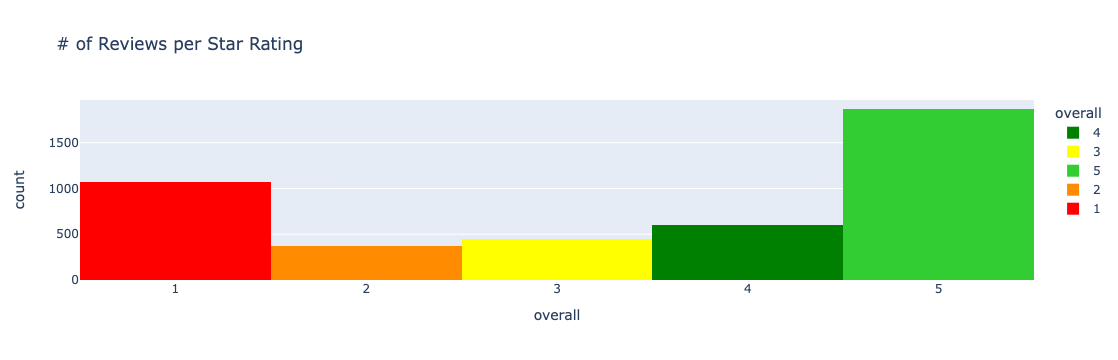

In [42]:
pfig = px.histogram(df, 'overall', color='overall',title='# of Reviews per Star Rating',color_discrete_map=colors)
pfig

In [43]:
def mute_colors_by_key(colors_dict, 
                       saturation_adj=.5,
                       lightness_adj=1.2, 
                       keys_to_mute = [],
                      colors_to_mute=[]):
    """
    Params:
    - colors_dict: Dictionary of css color names.
    - saturation_adj: Factor to adjust the color's saturation. 
                              Values < 1 decrease saturation; values > 1 increase it.
    - lightness_adj: Factor to adjust the color's lightness.
                            Values < 1 make the color darker; values > 1 make it lighter.
    - keys_to_mute: Either list of keys from colors_dict or None to apply to all colors
    - colors_to_mute: Color values in the dictionary to be muted.
    
    Exception raised if both keys_to_mute and colors_to_mute are empty.
    """
    if keys_to_mute is None:
        keys_to_mute = colors_dict.keys()
        
    if (len(keys_to_mute) == 0 ) & (len(colors_to_mute)==0):
        raise Exception("Must provie either keys_to_mute or colors_to_mute")
    # colors_to_mute = []
    muted_colors = {}
    for k,v in colors_dict.items():
        
        if (k in keys_to_mute) | (v in colors_to_mute):
            v = mute_color(v,
                             saturation_adjustment=saturation_adj,
                             lightness_adjustment=lightness_adj)
        muted_colors[k] = v
    return muted_colors

In [44]:
muted_colors = mute_colors_by_key(colors,keys_to_mute=None, saturation_adj=.7, lightness_adj=3)
muted_colors

{1: '#b20000', 2: '#b26200', 3: '#b2b200', 4: '#005a00', 5: '#009000'}

In [45]:
FPATHS['readme']['histogram-reviews-dist_png']

'images/01_histogram_reviews.png'

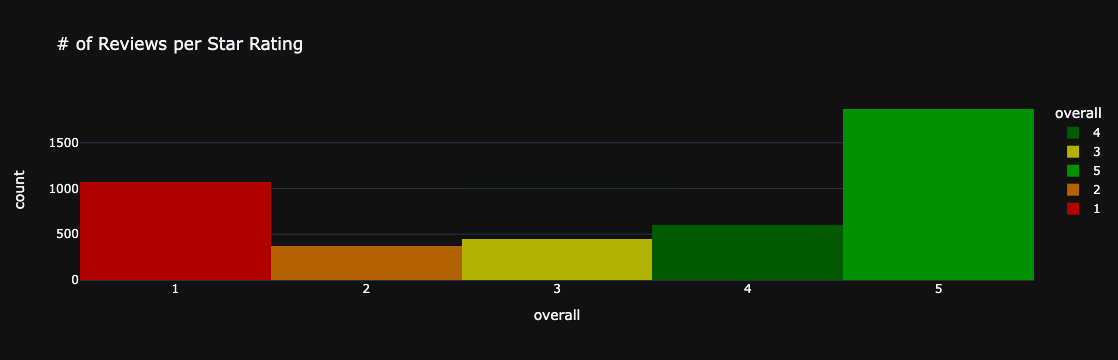

In [46]:
pfig = px.histogram(df, 'overall', color='overall',title='# of Reviews per Star Rating',
                    # color_discrete_map=mute_colors_by_key(colors, keys_to_mute=[3,4],
                    #                                       saturation_adj=.5,lightness_adj=1.2,)
                   color_discrete_map=muted_colors, width=800, template='plotly_dark')

pfig#.#to_image()

In [47]:
fname_histogram = FPATHS['readme']['histogram-reviews-dist_png']
# pfig#.#to_image()
with open(fname_histogram,'wb') as f:
    f.write(pfig.to_image('png'))

In [48]:
fname_histogram

'images/01_histogram_reviews.png'

![png](images/01_histogram_reviews.png)

In [49]:
ratings_by_year  = df.groupby('year',as_index=False)['overall'].value_counts(normalize=True)
ratings_by_year

year  overall  proportion
0   2012        5    0.666667
1   2012        3    0.333333
2   2013        5    0.454167
3   2013        4    0.195833
4   2013        1    0.154167
5   2013        2    0.100000
6   2013        3    0.095833
7   2014        5    0.475758
8   2014        1    0.172727
9   2014        4    0.150000
10  2014        3    0.121212
11  2014        2    0.080303
12  2015        5    0.471526
13  2015        1    0.200456
14  2015        4    0.152620
15  2015        3    0.112756
16  2015        2    0.062642
17  2016        5    0.470944
18  2016        1    0.208232
19  2016        4    0.138015
20  2016        3    0.094431
21  2016        2    0.088378
22  2017        5    0.384306
23  2017        1    0.320926
24  2017        4    0.118712
25  2017        3    0.100604
26  2017        2    0.075453
27  2018        5    0.337286
28  2018        1    0.332016
29  2018        4    0.122530
30  2018        2    0.114625
31  2018        3    0.093544

In [50]:
# px.bar(ratings_by_year, x='year', y='proportion',color='overall', color_discrete_map=muted_colors)

In [51]:
avg_rating_by_year  = df.groupby('year',#as_index=False
                                )[['overall']].mean().sort_index()#sort_values('year')

avg_rating_by_year = avg_rating_by_year.rename({'overall':"Average Rating"},axis=1)
avg_rating_by_year

Average Rating
year                
2012        4.333333
2013        3.695833
2014        3.675758
2015        3.632118
2016        3.575061
2017        3.170020
2018        3.018445

In [52]:

plot_df = df.rename({'overall':'Rating Counts'},axis=1)
count_ratings_by_year  = plot_df.groupby('year',#as_index=False
                                   )['Rating Counts'].value_counts(normalize=True).sort_index()
# count_ratings_by_year =count_ratings_by_year.rename('Rating Counts')
count_ratings_by_year = count_ratings_by_year.unstack(1).sort_index().fillna(0)
count_ratings_by_year

Rating Counts         1         2         3         4         5
year                                                           
2012           0.000000  0.000000  0.333333  0.000000  0.666667
2013           0.154167  0.100000  0.095833  0.195833  0.454167
2014           0.172727  0.080303  0.121212  0.150000  0.475758
2015           0.200456  0.062642  0.112756  0.152620  0.471526
2016           0.208232  0.088378  0.094431  0.138015  0.470944
2017           0.320926  0.075453  0.100604  0.118712  0.384306
2018           0.332016  0.114625  0.093544  0.122530  0.337286

In [53]:
def get_rating_percent_by_year(df, melted=False, melted_value_name ="%", melted_var_name="Stars"):
    
    plot_df = df.rename({'overall':'Rating Proportion'},axis=1)
    count_ratings_by_year  = plot_df.groupby('year',#as_index=False
                                       )['Rating Proportion'].value_counts(normalize=True).sort_index()
    
    count_ratings_by_year = count_ratings_by_year.unstack(1).sort_index().fillna(0)

    if melted==True:
        count_ratings_by_year = pd.melt(count_ratings_by_year.reset_index(drop=False),
                                        id_vars=['year'],
                                        value_name=melted_value_name,
                                        var_name=melted_var_name)
    return count_ratings_by_year

In [54]:
counts_by_year=  get_rating_percent_by_year(df)
counts_by_year

Rating Proportion         1         2         3         4         5
year                                                               
2012               0.000000  0.000000  0.333333  0.000000  0.666667
2013               0.154167  0.100000  0.095833  0.195833  0.454167
2014               0.172727  0.080303  0.121212  0.150000  0.475758
2015               0.200456  0.062642  0.112756  0.152620  0.471526
2016               0.208232  0.088378  0.094431  0.138015  0.470944
2017               0.320926  0.075453  0.100604  0.118712  0.384306
2018               0.332016  0.114625  0.093544  0.122530  0.337286

In [55]:
# counts_by_year=  get_rating_percent_by_year(df)
# counts_by_year

In [56]:
melted_counts_by_year = get_rating_percent_by_year(df, melted=True)
melted_counts_by_year

year Stars         %
0   2012     1  0.000000
1   2013     1  0.154167
2   2014     1  0.172727
3   2015     1  0.200456
4   2016     1  0.208232
5   2017     1  0.320926
6   2018     1  0.332016
7   2012     2  0.000000
8   2013     2  0.100000
9   2014     2  0.080303
10  2015     2  0.062642
11  2016     2  0.088378
12  2017     2  0.075453
13  2018     2  0.114625
14  2012     3  0.333333
15  2013     3  0.095833
16  2014     3  0.121212
17  2015     3  0.112756
18  2016     3  0.094431
19  2017     3  0.100604
20  2018     3  0.093544
21  2012     4  0.000000
22  2013     4  0.195833
23  2014     4  0.150000
24  2015     4  0.152620
25  2016     4  0.138015
26  2017     4  0.118712
27  2018     4  0.122530
28  2012     5  0.666667
29  2013     5  0.454167
30  2014     5  0.475758
31  2015     5  0.471526
32  2016     5  0.470944
33  2017     5  0.384306
34  2018     5  0.337286

<Axes: xlabel='year'>

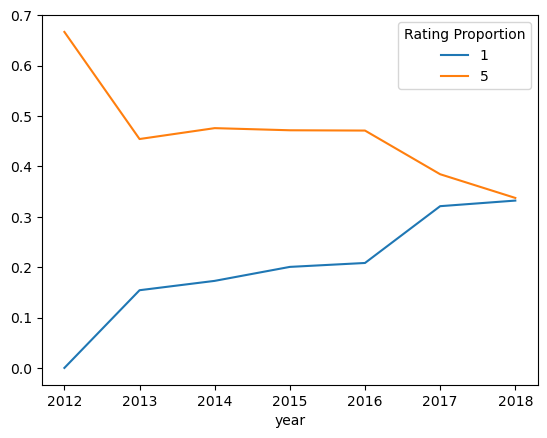

In [57]:
counts_by_year[[1,5]].plot()

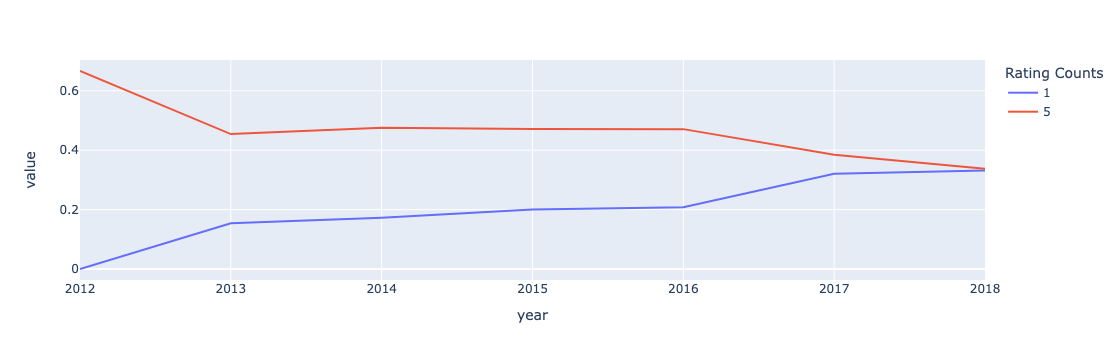

In [58]:
px.line(count_ratings_by_year[[1,5]])#.plot()

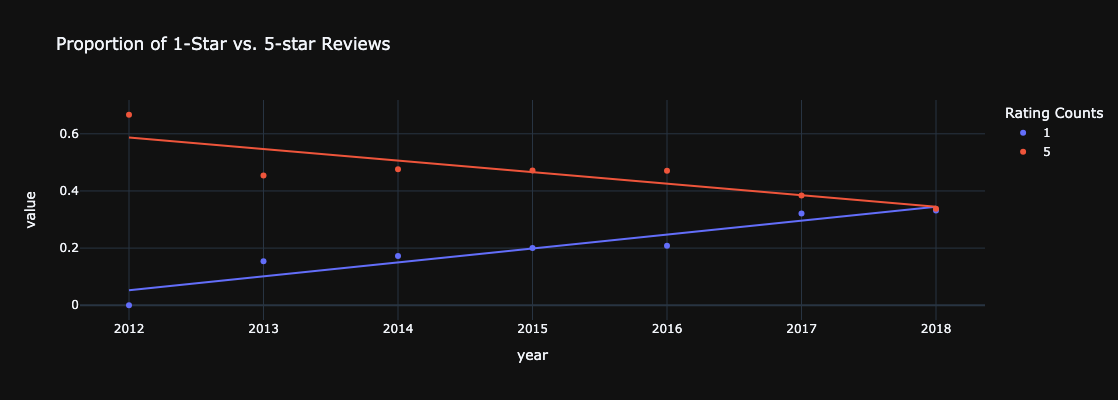

In [59]:
pfig = px.scatter(count_ratings_by_year[[1,5]], trendline='ols', width = 800, height=400,template='plotly_dark',
           title='Proportion of 1-Star vs. 5-star Reviews')
pfig

In [60]:
fname_counts = FPATHS['readme']['number-reviews-stars-by-year_png']
# pfig#.#to_image()
with open(fname_counts,'wb') as f:
    f.write(pfig.to_image('png'))

In [61]:
Markdown(f"![png]({fname_counts})")

![png](images/03_count_stars_by_year.png)

In [62]:
melted_counts_by_year = get_rating_percent_by_year(df, melted=True)
melted_counts_by_year

year Stars         %
0   2012     1  0.000000
1   2013     1  0.154167
2   2014     1  0.172727
3   2015     1  0.200456
4   2016     1  0.208232
5   2017     1  0.320926
6   2018     1  0.332016
7   2012     2  0.000000
8   2013     2  0.100000
9   2014     2  0.080303
10  2015     2  0.062642
11  2016     2  0.088378
12  2017     2  0.075453
13  2018     2  0.114625
14  2012     3  0.333333
15  2013     3  0.095833
16  2014     3  0.121212
17  2015     3  0.112756
18  2016     3  0.094431
19  2017     3  0.100604
20  2018     3  0.093544
21  2012     4  0.000000
22  2013     4  0.195833
23  2014     4  0.150000
24  2015     4  0.152620
25  2016     4  0.138015
26  2017     4  0.118712
27  2018     4  0.122530
28  2012     5  0.666667
29  2013     5  0.454167
30  2014     5  0.475758
31  2015     5  0.471526
32  2016     5  0.470944
33  2017     5  0.384306
34  2018     5  0.337286

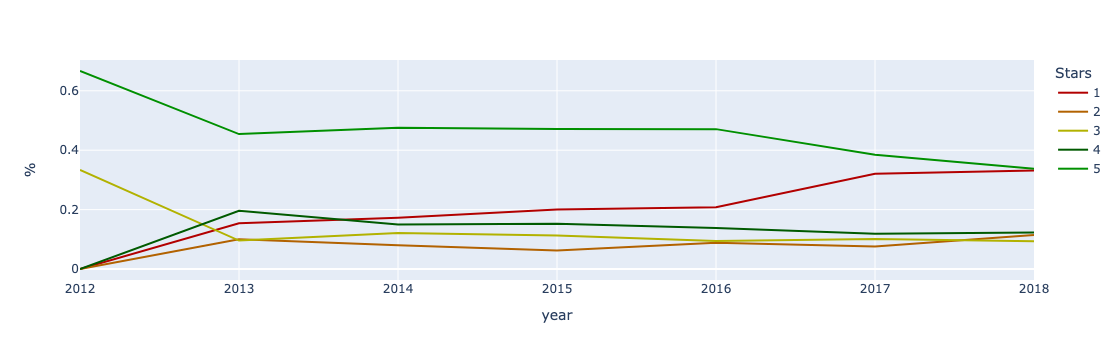

In [63]:
px.line(melted_counts_by_year,x='year',y='%',color="Stars",color_discrete_map=muted_colors,#[stars_to_plot], 
                        # category_orders =[1,5]
       )#[stars_to_plot]))


In [64]:
# px.s

In [65]:
def get_average_rating_by_year(df):
    avg_rating_by_year  = df.groupby('year',
                                )[['overall']].mean().sort_index()

    avg_rating_by_year = avg_rating_by_year.rename({'overall':"Average Rating"},axis=1)
    return avg_rating_by_year

In [66]:
avg_by_year = get_average_rating_by_year(df)
avg_by_year

Average Rating
year                
2012        4.333333
2013        3.695833
2014        3.675758
2015        3.632118
2016        3.575061
2017        3.170020
2018        3.018445

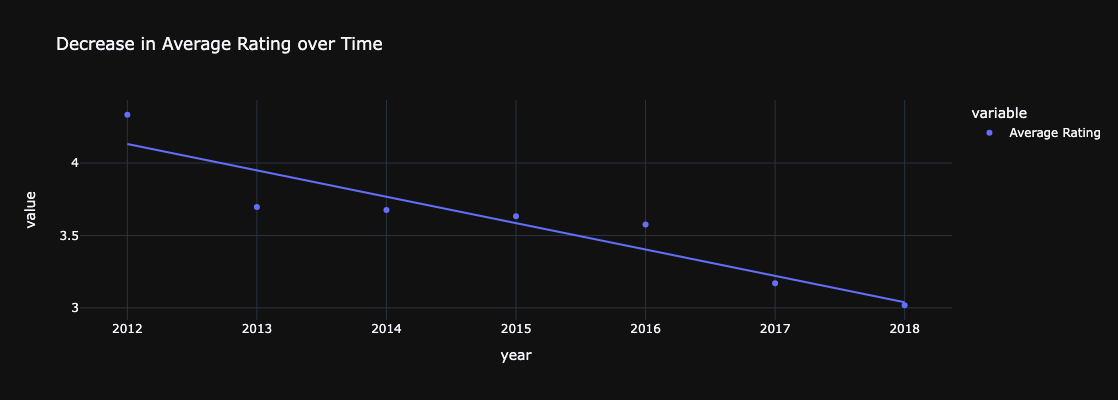

In [67]:
pfig = px.scatter(avg_by_year, trendline='ols', width=800, height=400, template='plotly_dark', title="Decrease in Average Rating over Time",
            )
pfig

In [68]:
fname_avg_reviews = FPATHS['readme']['avg-reviews-by-year_png']
# pfig#.#to_image()
with open(fname_avg_reviews,'wb') as f:
    f.write(pfig.to_image('png'))

In [69]:
Markdown(f"![png]({fname_avg_reviews})")

![png](images/02_avg_rating_by_year.png)

In [70]:
# os.environ['OPENAI_API_KEY']

In [71]:
# pd.concat([avg_rating_by_year,count_ratings_by_year],axis=1)

In [72]:
# pd.melt(counts_by_year, value_name="%", var_name='Stars')

In [73]:
# px.bar(avg_rating_by_year,x='year',y='overall',color='year')

In [74]:
# px.line(df, x='year',y='overall',line_group='color)

# Ngrams

In [75]:
help(fn.compare_ngram_measures_df)

Help on function compare_ngram_measures_df in module custom_functions:

compare_ngram_measures_df(group1_tokens, group2_tokens, ngrams=2, measure='raw_freq', min_freq=1, top_n=25, words_colname='Words', group1_name=None, group2_name=None, multi_index=True)
    Compare 2 groups ngrams side-by-side



# Interactive Wordclouds

In [76]:
df.columns

Index(['asin', 'reviewerID', 'reviewText', 'summary', 'overall', 'year',
       'title', 'brand', 'category', 'review-text-full',
       'review-text-full_raw', 'tokens-dirty', 'tokens', 'lemmas',
       'tokens-dirty-joined', 'tokens-joined', 'lemmas-joined',
       'target-rating'],
      dtype='object')

In [77]:
# from

### from freqdist

In [78]:
# Test code before function
df_for_groups = df.dropna(subset=['target-rating'])
for group in df_for_groups['target-rating'].unique():
    print(group)

High
Low


In [79]:
# import nltk 
# from wordcloud import STOPWORDS
# def get_groups_freqs_wordclouds(df,ngrams=1, group_col='target-rating',
#                               text_col='review-text-full',as_freqs=True,as_tokens=False, tokenizer=nltk.casual_tokenize,
#                              drop_groups=[], stopwords=[*STOPWORDS], ):#, return_tokens = False):
#     """Get single string for each group for wordClouds
#     Note: text_col must contain strings, not lists of tokens. 
#     """
#     group_texts  = {}
#     # Remove unwanted groups
#     df = df[~df[group_col].isin(drop_groups)]

#     # Loop through remaining groups
#     for group_name in df[group_col].unique():
#         filter_group = df[group_col] == group_name

#         if filter_group.sum() == 0:
#             continue
#         # Save filtered dataframe and reset index for test_value
#         group_df = df[filter_group].reset_index(drop=True)
#         test_value = group_df.loc[0, text_col]

#         # Combine list columns of test value is a list
#         if isinstance(test_value,list):
#             group_df[text_col] =  group_df[text_col].map(lambda x: " ".join(x))
            
        
#         # Join together final text
#         joined_text  =  " ".join(group_df[text_col])

#         ## Get freqs
#         if (as_tokens == True) | (as_freqs==True):
#             group_tokens = tokenizer(joined_text)
#             # Remove stopwords and get freqs
#             group_tokens = [w.lower() for w in group_tokens if w.lower() not in stopwords]
    
            
#             if as_freqs==True:
                
#                 if ngrams >1:
#                     group_tokens = nltk.ngrams(group_tokens, ngrams)

#                     # group_tokens = 
#                     for i,word_tuple in enumerate(group_tokens):
                        
#                         combined_ngram = " ".join(word_tuple)
#                         group_tokens[i] = combined_ngram
                        

#                 # Make the freq dist
#                 freq_dict = dict(nltk.FreqDist(group_tokens))
#                 group_texts[group_name] = freq_dict
#             else:
#                 group_texts[group_name] = group_tokens
              
#         else:
#            # Save final text
#             group_texts[group_name] = joined_text
    
#     return group_texts

In [80]:
import nltk
from wordcloud import STOPWORDS

def get_groups_freqs_wordclouds(df, ngrams=1, group_col='target-rating', text_col='review-text-full', 
                                as_freqs=True, as_tokens=False, tokenizer=nltk.casual_tokenize, 
                                drop_groups=[], stopwords=[*STOPWORDS]):
    """Get frequencies or raw texts for word clouds by group."""
    # Filter out unwanted groups upfront
    df_filtered = df[~df[group_col].isin(drop_groups)]
    
    # Make stopwords a set
    stopwords = set(stopwords)
    
    # Initialize result dictionary
    group_texts = {}
    
    # Process each group
    for group_name, group_df in df_filtered.groupby(group_col):
        # Handle list of tokens in text_col
        joined_texts = " ".join(group_df[text_col].explode().fillna('') if isinstance(group_df[text_col].iloc[0], list) else group_df[text_col])
        
        # Tokenize if necessary
        if as_tokens or as_freqs:
            tokens = [w.lower() for w in tokenizer(joined_texts) if w.lower() not in stopwords]
            
            # Generate n-grams if requested
            if ngrams > 1:
                tokens = [" ".join(ngram) for ngram in nltk.ngrams(tokens, ngrams)]
                
            if as_freqs:
                # Calculate frequency distribution
                group_texts[group_name] = dict(nltk.FreqDist(tokens))
            else:
                group_texts[group_name] = tokens
        else:
            group_texts[group_name] = joined_texts
            
    return group_texts


In [81]:
# Preview The Group Dict
def preview_group_freqs(group_freqs_words):
    for group_name, group_dict in group_freqs_words.items():
        print("\n",f"- Group: {group_name}")
        i = 0
        # If its a list
        if isinstance(group_dict,list):
            if i > 5:
                break
            else:
                print(group_dict[:5])
        elif isinstance(group_dict, str):
            print(group_dict[:100])
        else:
            for key,val in group_dict.items():
                if i >5:
                    break
                else:
                    i+=1    
                    print(f"\t'{key}' : {val}")

In [82]:
# Testing function - freqs -n unigrams
group_freqs_words = get_groups_freqs_wordclouds(df,as_freqs=True, ngrams=1, 
                                                stopwords=[*STOPWORDS,'go'] #testing stopwords
                                               )
print(type(group_freqs_words['High']))#['go']#[:100]
preview_group_freqs(group_freqs_words)

<class 'dict'>

 - Group: High
	'green' : 16
	'noodles' : 1649
	':' : 1978
	'herb' : 7
	'flavor' : 317
	'makes' : 58

 - Group: Low
	'good' : 204
	'taste' : 459
	':' : 1460
	'bad' : 147
	'.' : 3953
	'noodles' : 601


In [83]:
# Testing function - strings
group_strings = get_groups_freqs_wordclouds(df,as_freqs=False, as_tokens=False)
print(type(group_strings['High']))
preview_group_freqs(group_strings)

<class 'str'>

 - Group: High
Go for the green noodles: The herb flavor makes the odd texture of shirataki much more palatable. It

 - Group: Low
NOT A GOOD TASTE: Taste so bad. the noodles and rice fill like rubber in texture and don't absorb th


In [84]:
# Testing function - tokens
group_tokens = get_groups_freqs_wordclouds(df, as_freqs=False, as_tokens=True,
                                                stopwords=[*STOPWORDS,'go'] #testing stopwords
                                          )

print(type(group_tokens['High']))
preview_group_freqs(group_tokens)

<class 'list'>

 - Group: High
['green', 'noodles', ':', 'herb', 'flavor']

 - Group: Low
['good', 'taste', ':', 'taste', 'bad']


In [85]:
# # Test unig
# group_freqs_words = get_groups_freqs_wordclouds(df,ngrams=1)
# group_freqs_words.keys()

In [86]:
group_freqs_trigrams = get_groups_freqs_wordclouds(df,ngrams=3, as_freqs=True, stopwords=[*STOPWORDS,'go'] #testing stopwords
)
preview_group_freqs(group_freqs_trigrams)


 - Group: High
	'green noodles :' : 1
	'noodles : herb' : 1
	': herb flavor' : 1
	'herb flavor makes' : 1
	'flavor makes odd' : 1
	'makes odd texture' : 1

 - Group: Low
	'good taste :' : 1
	'taste : taste' : 1
	': taste bad' : 2
	'taste bad .' : 2
	'bad . noodles' : 2
	'. noodles rice' : 2


In [87]:
# five,one,sta

In [88]:
add_stopwords = st.text_input("Enter list of words to exclude (insert a comma between words):",value='five,one,star')
add_stopwords

'five,one,star'

In [89]:
from nltk import casual_tokenize
def get_stopwords_from_string(stopwords_to_add = None, default_stopwords=True, ):

    
    # Add nclude the 
    if default_stopwords == True:
        from wordcloud import STOPWORDS
        from string import punctuation
        custom_stopwords = [*STOPWORDS,*punctuation]
    else:
        custom_stopwords = []
        
    # If add_stopwords is a string, tokenize it first
    if isinstance(stopwords_to_add, str):
        add_stopwords = casual_tokenize(stopwords_to_add)
    else:
        add_stopwords = stopwords_to_add
    
    
    # Combine custom_stopwords
    combined_stopwords = [*custom_stopwords, *add_stopwords]
    return combined_stopwords

In [90]:
stopwords_list = get_stopwords_from_string(stopwords_to_add=add_stopwords)
stopwords_list[:5]

['having', "we'd", 'that', 'shall', "who's"]

In [91]:
df.columns

Index(['asin', 'reviewerID', 'reviewText', 'summary', 'overall', 'year',
       'title', 'brand', 'category', 'review-text-full',
       'review-text-full_raw', 'tokens-dirty', 'tokens', 'lemmas',
       'tokens-dirty-joined', 'tokens-joined', 'lemmas-joined',
       'target-rating'],
      dtype='object')

In [92]:
## MENU FOR WORDCLOUDS

## Select which text column/preprocessing
text_col_map  ={"Original Text":'review-text-full',
                "Tokenized Text (no stopwords)":'',
               'Lemmatzied Text':'lemmas'
               }
text_preprocessing_selection  =  st.radio("Select Text Processing",options=list(text_col_map.keys()),# ['Original','Lemmas','Cleaned Tokens'],
                                          index=0)
text_col_selection = text_col_map[text_preprocessing_selection]


## Select # of words/ngrams
ngram_map = {'Single Words':1,
            'Bigrams':2,
            'Trigrams':3,
            'Quadgrams':4}
ngram_selection = st.radio("Select ngrams", options=list(ngram_map.keys()), #['Single Words','Bigrams','Trigrams','Quadgrams'],
                           index=0)
ngram_n = ngram_map[ngram_selection]

# Select custom stopwords
add_stopwords_str = st.text_input("Enter list of words to exclude:",value='five,one,star')
stopwords_list = get_stopwords_from_string(add_stopwords_str)

In [93]:
group_texts = get_groups_freqs_wordclouds(df,ngrams=ngram_n, as_freqs=True, 
                                          group_col='target-rating', text_col = text_col_selection,
                                         stopwords=stopwords_list) #testing stopwords
preview_group_freqs(group_texts)


 - Group: High
	'go' : 102
	'green' : 16
	'noodles' : 1649
	'herb' : 7
	'flavor' : 317
	'makes' : 58

 - Group: Low
	'good' : 204
	'taste' : 459
	'bad' : 147
	'noodles' : 601
	'rice' : 246
	'fill' : 8


In [94]:
# from wordcloud import WordCloud
# WordCloud?

In [95]:
df

asin      reviewerID  \
0     B007JINB0W   A3Y51NV9HU5T2   
1     B007JINB0W  A3D7EFSRC6Y9MP   
2     B007JINB0W    A4AM5KBP3I2R   
3     B007JINB0W  A3GHK4IL78DB7Y   
4     B007JINB0W   AH3B94LQOPPY6   
...          ...             ...   
4358  B007JINB0W   A73IG1ED6S0JR   
4359  B007JINB0W  A1XZ2H0MYG54M0   
4360  B007JINB0W  A3I2YF0MXB7P0B   
4361  B007JINB0W  A2UELLFLITPMT1   
4362  B007JINB0W  A178M2AHNWQZB0   

                                             reviewText  \
0     Great pasta taste and feel, but the spell in t...   
1     The texture just made it a little strange to e...   
2     The herb flavor makes the odd texture of shira...   
3     I didn't have a problem at all with a half fil...   
4         They taste like whatever you cook them with.    
...                                                 ...   
4358  Product arrived with two of the bags punctured...   
4359                                                Ok.   
4360  I like these noodles but the spinach ones just...   
4361            Truly horrific. Like eating dead worms.   
4362  We love the rice noodles, and have problems fi...   

                                                summary  overall  year  \
0                                            Four Stars        4  2018   
1                           Okay but don't like texture        3  2014   
2                              Go for the green noodles        5  2018   
3                            Its an awesome substitute.        5  2018   
4                                            Five Stars        5  2016   
...                                                 ...      ...   ...   
4358                                 would not recomend        1  2016   
4359                                         Five Stars        5  2016   
4360  Not awful, but now I know why these were on sale.        2  2013   
4361                                 Don't even try it.        1  2017   
4362   As good as all the other Miracle noodle products        5  2017   

                                                  title           brand  \
0     Miracle Noodle Zero Carb, Gluten Free Shiratak...  Miracle Noodle   
1     Miracle Noodle Zero Carb, Gluten Free Shiratak...  Miracle Noodle   
2     Miracle Noodle Zero Carb, Gluten Free Shiratak...  Miracle Noodle   
3     Miracle Noodle Zero Carb, Gluten Free Shiratak...  Miracle Noodle   
4     Miracle Noodle Zero Carb, Gluten Free Shiratak...  Miracle Noodle   
...                                                 ...             ...   
4358  Miracle Noodle Zero Carb, Gluten Free Shiratak...  Miracle Noodle   
4359  Miracle Noodle Zero Carb, Gluten Free Shiratak...  Miracle Noodle   
4360  Miracle Noodle Zero Carb, Gluten Free Shiratak...  Miracle Noodle   
4361  Miracle Noodle Zero Carb, Gluten Free Shiratak...  Miracle Noodle   
4362  Miracle Noodle Zero Carb, Gluten Free Shiratak...  Miracle Noodle   

                                               category  \
0     Grocery & Gourmet Food; Pasta & Noodles; Noodl...   
1     Grocery & Gourmet Food; Pasta & Noodles; Noodl...   
2     Grocery & Gourmet Food; Pasta & Noodles; Noodl...   
3     Grocery & Gourmet Food; Pasta & Noodles; Noodl...   
4     Grocery & Gourmet Food; Pasta & Noodles; Noodl...   
...                                                 ...   
4358  Grocery & Gourmet Food; Pasta & Noodles; Noodl...   
4359  Grocery & Gourmet Food; Pasta & Noodles; Noodl...   
4360  Grocery & Gourmet Food; Pasta & Noodles; Noodl...   
4361  Grocery & Gourmet Food; Pasta & Noodles; Noodl...   
4362  Grocery & Gourmet Food; Pasta & Noodles; Noodl...   

                                       review-text-full  \
0     Four Stars: Great pasta taste and feel, but th...   
1     Okay but don't like texture: The texture just ...   
2     Go for the green noodles: The herb flavor make...   
3     Its an awesome substitute.: I didn't have a pr...   
4     Five Stars: They taste like whatever you cook ...   
...              

In [96]:

def plot_wordclouds(grp1_cloud, grp2_cloud, 
                    grp1_cloud_label="Low Ratings", 
                    grp2_cloud_label='High Ratings',
                    title='Comparing Word Usage', figsize=(8, 5), 
                    title_params ={'y':1.0,"fontsize":'xx-large'},
                   ):
    """Plots the wordlcouds for two groups"""
    import matplotlib.pyplot as plt

    ## Plot the Images
    fig, axes = plt.subplots(ncols=2, figsize=figsize)

    
    axes[0].imshow(grp1_cloud)
    axes[0].set_title(grp1_cloud_label)
    axes[0].axis('off')

    axes[1].imshow(grp2_cloud)
    axes[1].set_title(grp2_cloud_label)
    axes[1].axis('off')

    if title is not None:
        fig.suptitle(title,**title_params)

    fig.tight_layout()    
    return fig


In [97]:
def make_wordclouds_from_freqs(groups_dict,  grp1_key="Low", grp2_key="High",
                               grp1_cmap = "Reds", grp2_cmap ="Greens",stopwords=None, 
                               width=800, height=1000, min_word_length=2, max_words=200,
                               cloud_kws = {},
                               plot_clouds=True,
                               figsize=(8, 5), grp1_label=None, grp2_label=None, title=None,
                               title_params ={'y':1.01,"fontsize":'xx-large'}):
    import matplotlib.pyplot as plt
    from wordcloud import WordCloud

    # Make word clouds of processed tokens
    shared_params = dict(random_state = 42,
                          width = width,
                          height = height, stopwords=stopwords,
                          min_word_length = min_word_length,
                        **cloud_kws)

    # Slice groups from dict
    grp1_text = groups_dict[grp1_key]
    grp2_text = groups_dict[grp2_key]

    
    # Create an instance of a WordCloud but DO NOT GENERATE YET
    grp1_cloud = WordCloud(colormap=grp1_cmap, **shared_params)
    grp2_cloud = WordCloud(colormap=grp2_cmap, **shared_params)
    
    if isinstance(grp1_text, dict):
        grp1_cloud = grp1_cloud.generate_from_frequencies(grp1_text)
        grp2_cloud = grp2_cloud.generate_from_frequencies(grp2_text)
    else:
        grp1_cloud = grp1_cloud.generate(grp1_text)
        grp2_cloud = grp2_cloud.generate(grp2_text)

    if plot_clouds == False:
        return grp1_cloud, grp2_cloud
        
    else:
        # Use keys if no laebels given
        if grp1_label is None:
            grp1_label = grp1_key.title()
        if grp2_label is None: 
            grp2_label = grp2_key.title()
            
        return plot_wordclouds(grp1_cloud, grp2_cloud, grp1_cloud_label=grp1_label,figsize=figsize,
                             grp2_cloud_label=grp2_label,title=title, title_params=title_params)
         

In [98]:
## MENU FOR WORDCLOUDS

## Select which text column/preprocessing
text_col_map  ={"Original Text":'review-text-full',
                "Tokenized Text (no stopwords)":'',
               'Lemmatzied Text':'lemmas'
               }
text_preprocessing_selection  =  st.radio("Select Text Processing",options=list(text_col_map.keys()),# ['Original','Lemmas','Cleaned Tokens'],
                                          index=0)
text_col_selection = text_col_map[text_preprocessing_selection]


## Select # of words/ngrams
ngram_map = {'Single Words':1,
            'Bigrams':2,
            'Trigrams':3,
            'Quadgrams':4}
ngram_selection = st.radio("Select ngrams", options=list(ngram_map.keys()), #['Single Words','Bigrams','Trigrams','Quadgrams'],
                           index=1)
ngram_n = ngram_map[ngram_selection]

# Select custom stopwords
add_stopwords_str = st.text_input("Enter list of words to exclude:",value='five,two,stars,one,star,angel,hair,miracle,noodles,shirataki,pasta')
stopwords_list = get_stopwords_from_string(add_stopwords_str)

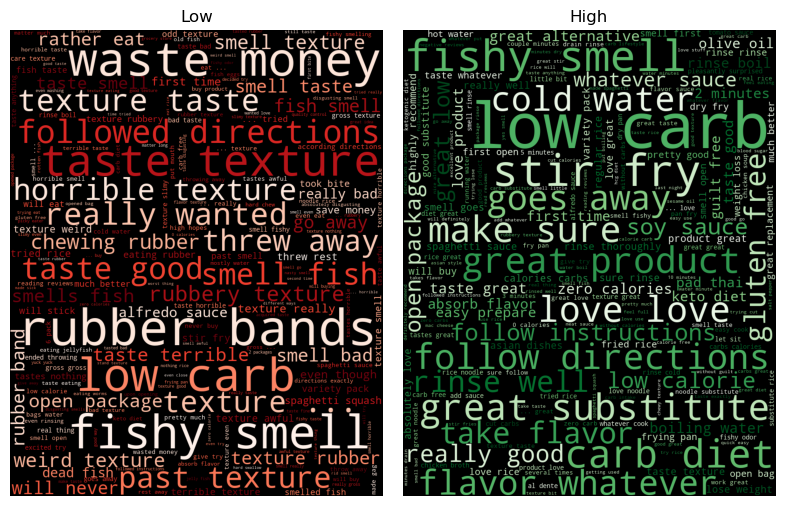

In [99]:
group_texts = get_groups_freqs_wordclouds(df,ngrams=ngram_n, as_freqs=True, 
                                          group_col='target-rating', text_col = text_col_selection,
                                         stopwords=stopwords_list) #testing stopwords
# preview_group_freqs(group_texts)
fig = make_wordclouds_from_freqs(group_texts,stopwords=stopwords_list, )
fig.savefig(FPATHS['readme']['wordclouds-by-group_png'], dpi=300, bbox_inches='tight')

In [100]:
# # fn.get_groups_freqs_wordclouds(df, ngrams=1,)
# ## ADDING MORE STOPWORDS FOR EDA
# from wordcloud import STOPWORDS
# stopwords_list = [*STOPWORDS, 'angel','hair','miracle','noodle','shirataki','pasta']

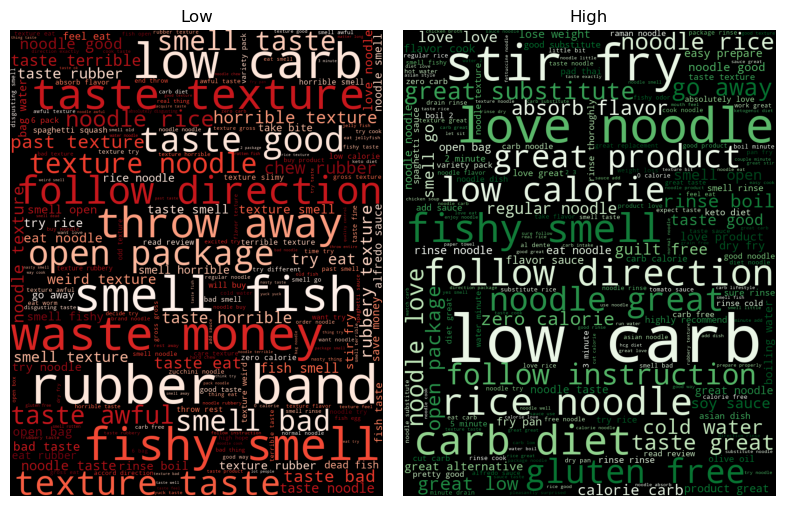

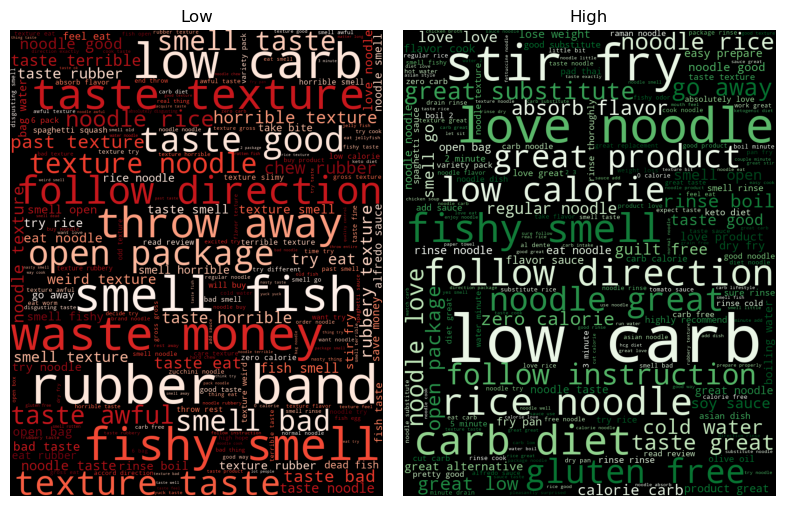

In [101]:
group_texts = get_groups_freqs_wordclouds(df,ngrams=ngram_n, as_freqs=True, 
                                          group_col='target-rating', text_col='lemmas',#text_col = text_col_selection,
                                         stopwords=stopwords_list) #testing stopwords
# preview_group_freqs(group_texts)
make_wordclouds_from_freqs(group_texts,stopwords=stopwords_list)

## NGrams

In [102]:
def get_groups_freqs_wordclouds(df, ngrams=1, group_col='target-rating', text_col='review-text-full', 
                                as_freqs=True, as_tokens=False, tokenizer=nltk.casual_tokenize, 
                                drop_groups=[], stopwords=[*STOPWORDS]):
    """Get frequencies or raw texts for word clouds by group."""
    if len(drop_groups) == 0:
        # Filter out unwanted groups upfront
        df_filtered = df[~df[group_col].isin(drop_groups)]
    else:
        df_filtered=df    
    # Make stopwords a set
    stopwords = set(stopwords)
    
    # Initialize result dictionary
    group_texts = {}
    
    # Process each group
    for group_name, group_df in df_filtered.groupby(group_col):
        # Handle list of tokens in text_col
        joined_texts = " ".join(group_df[text_col].explode().fillna('') if isinstance(group_df[text_col].iloc[0], list) else group_df[text_col])
        
        # Tokenize if necessary
        if as_tokens or as_freqs:
            tokens = [w.lower() for w in tokenizer(joined_texts) if w.lower() not in stopwords]
            
            # Generate n-grams if requested
            if ngrams > 1:
                tokens = [" ".join(ngram) for ngram in nltk.ngrams(tokens, ngrams)]
                
            if as_freqs:
                # Calculate frequency distribution
                group_texts[group_name] = dict(nltk.FreqDist(tokens))
            else:
                group_texts[group_name] = tokens
        else:
            group_texts[group_name] = joined_texts
            
    return group_texts



In [103]:
df

asin      reviewerID  \
0     B007JINB0W   A3Y51NV9HU5T2   
1     B007JINB0W  A3D7EFSRC6Y9MP   
2     B007JINB0W    A4AM5KBP3I2R   
3     B007JINB0W  A3GHK4IL78DB7Y   
4     B007JINB0W   AH3B94LQOPPY6   
...          ...             ...   
4358  B007JINB0W   A73IG1ED6S0JR   
4359  B007JINB0W  A1XZ2H0MYG54M0   
4360  B007JINB0W  A3I2YF0MXB7P0B   
4361  B007JINB0W  A2UELLFLITPMT1   
4362  B007JINB0W  A178M2AHNWQZB0   

                                             reviewText  \
0     Great pasta taste and feel, but the spell in t...   
1     The texture just made it a little strange to e...   
2     The herb flavor makes the odd texture of shira...   
3     I didn't have a problem at all with a half fil...   
4         They taste like whatever you cook them with.    
...                                                 ...   
4358  Product arrived with two of the bags punctured...   
4359                                                Ok.   
4360  I like these noodles but the spinach ones just...   
4361            Truly horrific. Like eating dead worms.   
4362  We love the rice noodles, and have problems fi...   

                                                summary  overall  year  \
0                                            Four Stars        4  2018   
1                           Okay but don't like texture        3  2014   
2                              Go for the green noodles        5  2018   
3                            Its an awesome substitute.        5  2018   
4                                            Five Stars        5  2016   
...                                                 ...      ...   ...   
4358                                 would not recomend        1  2016   
4359                                         Five Stars        5  2016   
4360  Not awful, but now I know why these were on sale.        2  2013   
4361                                 Don't even try it.        1  2017   
4362   As good as all the other Miracle noodle products        5  2017   

                                                  title           brand  \
0     Miracle Noodle Zero Carb, Gluten Free Shiratak...  Miracle Noodle   
1     Miracle Noodle Zero Carb, Gluten Free Shiratak...  Miracle Noodle   
2     Miracle Noodle Zero Carb, Gluten Free Shiratak...  Miracle Noodle   
3     Miracle Noodle Zero Carb, Gluten Free Shiratak...  Miracle Noodle   
4     Miracle Noodle Zero Carb, Gluten Free Shiratak...  Miracle Noodle   
...                                                 ...             ...   
4358  Miracle Noodle Zero Carb, Gluten Free Shiratak...  Miracle Noodle   
4359  Miracle Noodle Zero Carb, Gluten Free Shiratak...  Miracle Noodle   
4360  Miracle Noodle Zero Carb, Gluten Free Shiratak...  Miracle Noodle   
4361  Miracle Noodle Zero Carb, Gluten Free Shiratak...  Miracle Noodle   
4362  Miracle Noodle Zero Carb, Gluten Free Shiratak...  Miracle Noodle   

                                               category  \
0     Grocery & Gourmet Food; Pasta & Noodles; Noodl...   
1     Grocery & Gourmet Food; Pasta & Noodles; Noodl...   
2     Grocery & Gourmet Food; Pasta & Noodles; Noodl...   
3     Grocery & Gourmet Food; Pasta & Noodles; Noodl...   
4     Grocery & Gourmet Food; Pasta & Noodles; Noodl...   
...                                                 ...   
4358  Grocery & Gourmet Food; Pasta & Noodles; Noodl...   
4359  Grocery & Gourmet Food; Pasta & Noodles; Noodl...   
4360  Grocery & Gourmet Food; Pasta & Noodles; Noodl...   
4361  Grocery & Gourmet Food; Pasta & Noodles; Noodl...   
4362  Grocery & Gourmet Food; Pasta & Noodles; Noodl...   

                                       review-text-full  \
0     Four Stars: Great pasta taste and feel, but th...   
1     Okay but don't like texture: The texture just ...   
2     Go for the green noodles: The herb flavor make...   
3     Its an awesome substitute.: I didn't have a pr...   
4     Five Stars: They taste like whatever you cook ...   
...              

In [104]:
# Testing function - tokens
group_tokens = get_groups_freqs_wordclouds(df, as_freqs=False, as_tokens=True,
                                                stopwords=[*STOPWORDS,'go'] #testing stopwords
                                          )

In [105]:
# gr

In [106]:
# # Calculate Bigrams
# top_n = 25
# df_bigrams = fn.compare_ngram_measures_df(
#     low_review_tokens_list,
#     high_review_tokens_list,
#     ngrams=2,
#     min_freq=2,
#     top_n=top_n,
#     group1_name="Low Ratings",
#     group2_name="High Ratings",
# )
# # Save to markdown for README
# df_bigrams.to_markdown(FPATHS['eda']['bigrams']['ngram-table_md'])
# df_bigrams

In [107]:
## Add creating ngrams
st.subheader('N-Grams')
# ngrams=3
text_col_selection='review-text-full'

# ngrams = st.radio('n-grams', [2,3,4],horizontal=True,index=1)
top_n = st.selectbox('Compare Top # Ngrams',[10,15,20,25],index=2)
print(top_n)


# @st.cache_data
def show_ngrams(df, top_n, ngrams, text_col_selection, stopwords_list,
                 grp1_key="Low", grp2_key="High",measure='raw_freq' ,
               min_freq=1):

    group_texts = fn.get_groups_freqs_wordclouds(df, ngrams=1, #grp1_key=grp1_key, grp2_key =grp2_key,
                                              as_freqs=False, as_tokens=True, group_col='target-rating', 
                                              text_col = text_col_selection,
                                         stopwords=stopwords_list) #testing stopwords
    try:
        return  fn.compare_ngram_measures_df(group_texts[grp1_key], group_texts[grp2_key],
                                             measure=measure, ngrams=ngrams,min_freq=min_freq,top_n=top_n,
                                            group1_name=grp1_key, group2_name=grp2_key)
    except Exception as e:
        display(e)
        # return group_texts
## Test Code for Making New Trigrams for both groups

20


In [108]:
# fn.get_groups_freqs_wordclouds(df, ngrams=1,)
## ADDING MORE STOPWORDS FOR EDA
from wordcloud import STOPWORDS
from string import punctuation
stopwords_list = [*STOPWORDS, *punctuation, 'one','five','star','angel','hair','miracle','noodle','shirataki','pasta']

In [109]:
ngrams_df = show_ngrams(df,top_n, ngram_n,text_col_selection,stopwords_list=stopwords_list)#GROUPS=GROUPS,ngrams=ngrams,top_n=top_n)
# st.dataframe(ngrams_df, hide_index=True, width=1000, height=None)
# st.divider()
ngrams_df

Low                         High          
                  Words  Raw Freq              Words  Raw Freq
0             two stars  0.003168           low carb  0.004624
1          rubber bands  0.001893       love noodles  0.002379
2           waste money  0.001700           stir fry  0.001803
3           fishy smell  0.001622        fishy smell  0.001727
4              low carb  0.001584        stars great  0.001554
5         taste texture  0.001468          carb diet  0.001401
6   followed directions  0.001043   great substitute  0.001343
7         really wanted  0.000966       rice noodles  0.001266
8            taste good  0.000927      great product  0.001209
9      horrible texture  0.000889          make sure  0.001209
10         past texture  0.000889  follow directions  0.001170
11           smell fish  0.000889          goes away  0.001132
12        texture taste  0.000889         stars love  0.001113
13      rubbery texture  0.000850         cold water  0.001094
14          texture ...  0.000850      noodles great  0.001094
15           threw away  0.000850    flavor whatever  0.001055
16         love noodles  0.000811       noodles rice  0.001036
17       chewing rubber  0.000773        take flavor  0.001036
18      texture noodles  0.000773       noodles love  0.001017
19        smell texture  0.000695        gluten free  0.000978

In [110]:
ngrams_df.columns.get_level_values(0)

Index(['Low', 'Low', 'High', 'High'], dtype='object')

In [111]:
ngrams_df.columns

MultiIndex([( 'Low',    'Words'),
            ( 'Low', 'Raw Freq'),
            ('High',    'Words'),
            ('High', 'Raw Freq')],
           )

In [112]:
ngrams_df

Low                         High          
                  Words  Raw Freq              Words  Raw Freq
0             two stars  0.003168           low carb  0.004624
1          rubber bands  0.001893       love noodles  0.002379
2           waste money  0.001700           stir fry  0.001803
3           fishy smell  0.001622        fishy smell  0.001727
4              low carb  0.001584        stars great  0.001554
5         taste texture  0.001468          carb diet  0.001401
6   followed directions  0.001043   great substitute  0.001343
7         really wanted  0.000966       rice noodles  0.001266
8            taste good  0.000927      great product  0.001209
9      horrible texture  0.000889          make sure  0.001209
10         past texture  0.000889  follow directions  0.001170
11           smell fish  0.000889          goes away  0.001132
12        texture taste  0.000889         stars love  0.001113
13      rubbery texture  0.000850         cold water  0.001094
14          texture ...  0.000850      noodles great  0.001094
15           threw away  0.000850    flavor whatever  0.001055
16         love noodles  0.000811       noodles rice  0.001036
17       chewing rubber  0.000773        take flavor  0.001036
18      texture noodles  0.000773       noodles love  0.001017
19        smell texture  0.000695        gluten free  0.000978

In [113]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

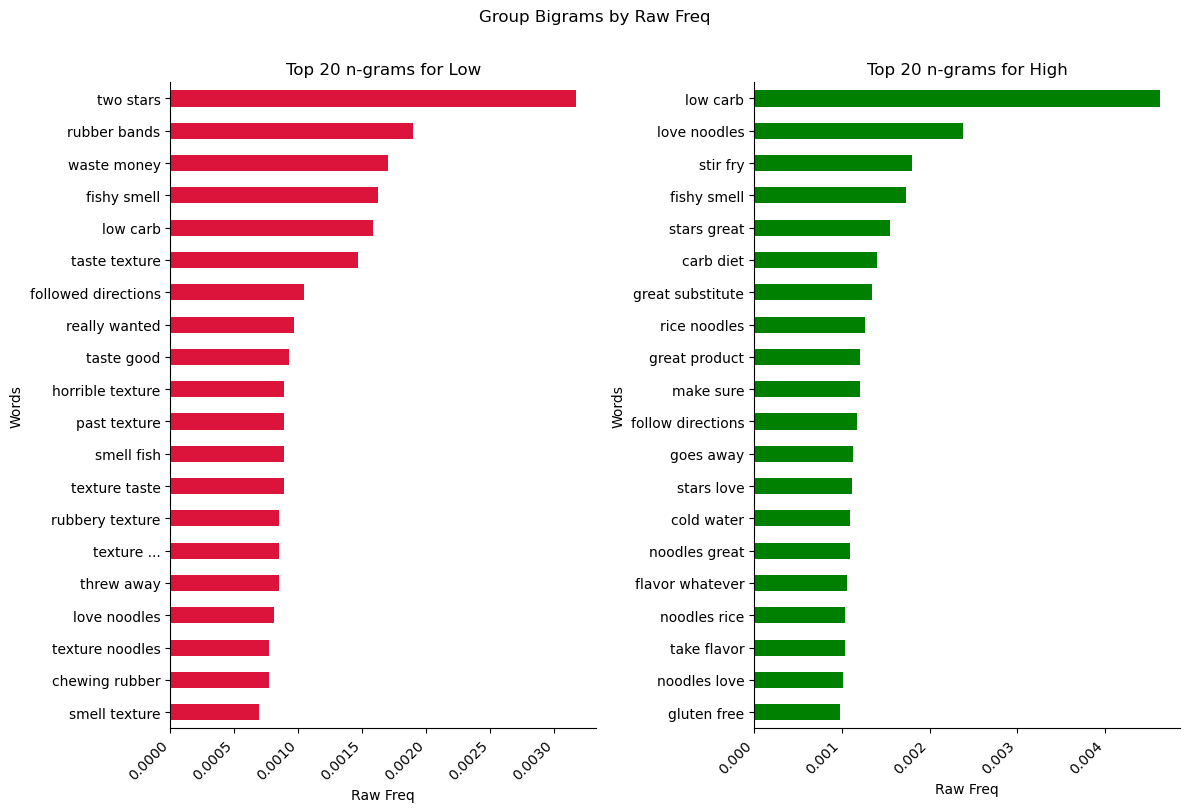

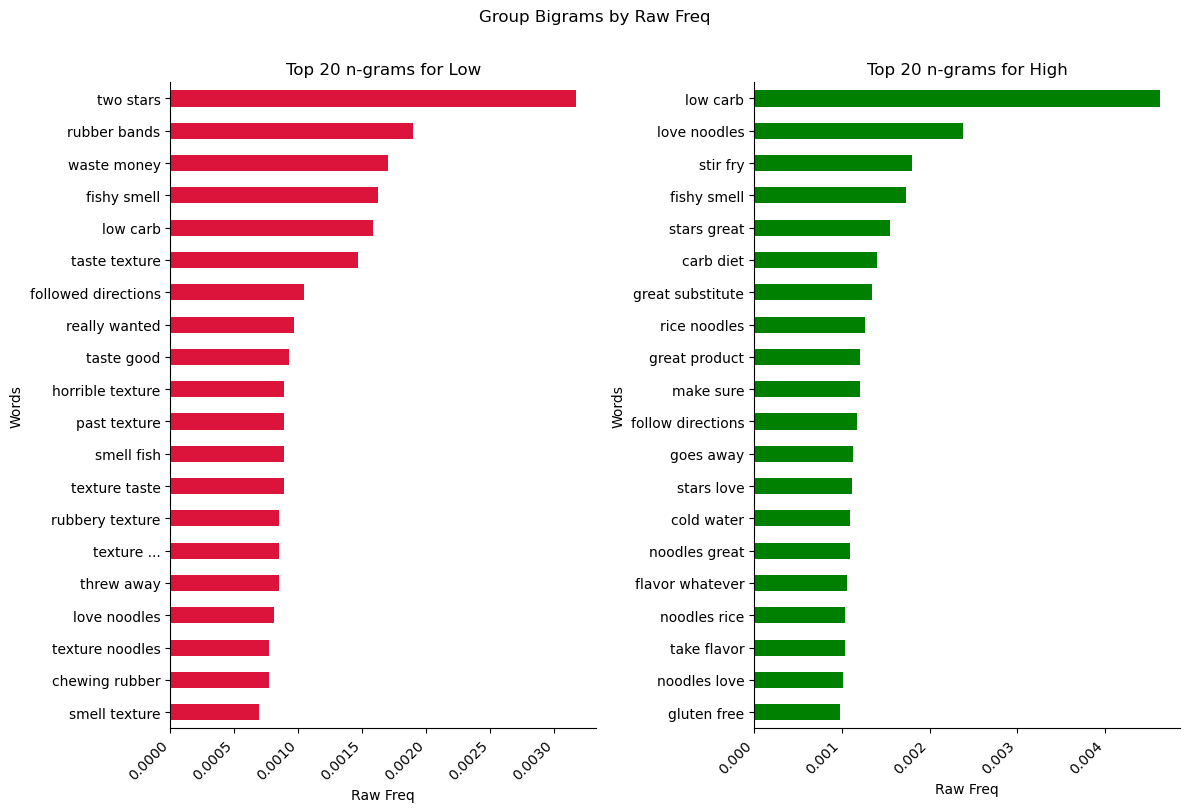

In [114]:
fig = fn.plot_group_ngrams(ngrams_df,)
fig

In [115]:
type(fig)

matplotlib.figure.Figure

#### Making PLotly version

In [116]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# # Sample data for the first subplot
# categories1 = ['A', 'B', 'C', 'D']
# values1 = [10, 20, 30, 40]

# # Sample data for the second subplot
# categories2 = ['W', 'X', 'Y', 'Z']
# values2 = [100, 200, 300, 400]

# def 
ngrams_df
mi_colname_1 = "Low"
mi_colname_2 = "High"

group_1_data = ngrams_df[mi_colname_1]
group_2_data = ngrams_df[mi_colname_2]
group_1_data

Words  Raw Freq
0             two stars  0.003168
1          rubber bands  0.001893
2           waste money  0.001700
3           fishy smell  0.001622
4              low carb  0.001584
5         taste texture  0.001468
6   followed directions  0.001043
7         really wanted  0.000966
8            taste good  0.000927
9      horrible texture  0.000889
10         past texture  0.000889
11           smell fish  0.000889
12        texture taste  0.000889
13      rubbery texture  0.000850
14          texture ...  0.000850
15           threw away  0.000850
16         love noodles  0.000811
17       chewing rubber  0.000773
18      texture noodles  0.000773
19        smell texture  0.000695

In [117]:

# colors = fn.mute_colors_by_key()
muted_colors = fn.mute_colors_by_key(colors,keys_to_mute=[2,3,4])
muted_colors

{1: 'red', 2: '#804600', 3: '#808000', 4: '#004000', 5: 'limegreen'}

In [118]:
# Get the column names and then sort by value col
# Create a subplot figure with 1 row and 2 columns


def plotly_group_ngrams_df(
    ngrams_df,
    mi_colname_1="Low",
    mi_colname_2="High",
    color_1 = "red",
    color_2 = "green",
    height=600,
    width=1000,
    title="Top n-grams per Group",
    show=False,
):
    fig = make_subplots(
        rows=1,
        cols=2,
        subplot_titles=(mi_colname_1, mi_colname_2),
        horizontal_spacing=0.1
        # margin=dict(l=40, r=40, t=40, b=40),
        # Optional titles
    )

    
    # Set color list for indexing with i
    col_color_list = [color_1, color_2]
    # Slice the columns for the current group
    for i, group_name in enumerate([mi_colname_1, mi_colname_2]):
        group_data = ngrams_df[group_name]
        word_col, val_col = group_data.columns

        # Sort values so bars appear in correct order
        group_data = group_data.sort_values(by=val_col)

        # Add to the fifugre
        fig.add_trace(
            go.Bar(
                x=group_data[val_col],
                y=group_data[word_col],
                orientation="h",
                marker=dict(color=col_color_list[i]),
                name=group_name,
            ),
            row=1,
            col=i + 1,
        )

    # Update layout if necessary (optional)
    fig.update_layout(
        height=height,
        width=width,
        showlegend=False,  # overwrite=True,
        title_text=title,
    )
    fig.update_yaxes(automargin=True)  # , autorange='left+width+right')#,row=1,col=1)

    # Show plot
    if show == True:
        fig.show()
    return fig

In [119]:
# automargin
# Code: fig.update_xaxes(automargin=<VALUE>)
# Type: flaglist string. Any combination of "height", "width", "left", "right", "top", "bottom" joined with a "+" OR True or False.
# Examples: "height", "width", "height+width", "height+width+left", "True"
# Determines whether long tick labels automatically grow the figure margins.

In [120]:
import plotly.io as pio
# pio.templates.default='streamlit'
pio.templates.default='plotly_dark'

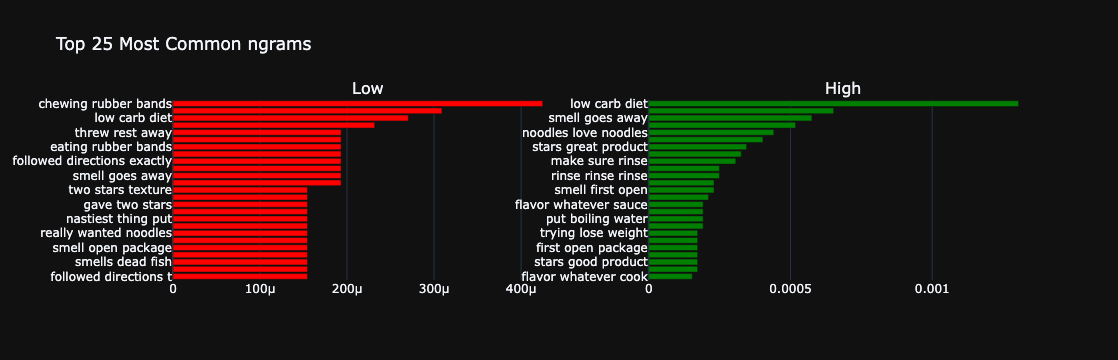

In [122]:
ngram_n=3
top_n=25
ngrams_df = fn.show_ngrams(df,top_n, ngram_n,text_col_selection,stopwords_list=stopwords_list)#GROUPS=GROUPS,ngrams=ngrams,top_n=top_n)
# with pio.templates.
pfig = fn.plotly_group_ngrams_df(ngrams_df,show=False, title=f"Top {top_n} Most Common ngrams")#, width=800)
pfig


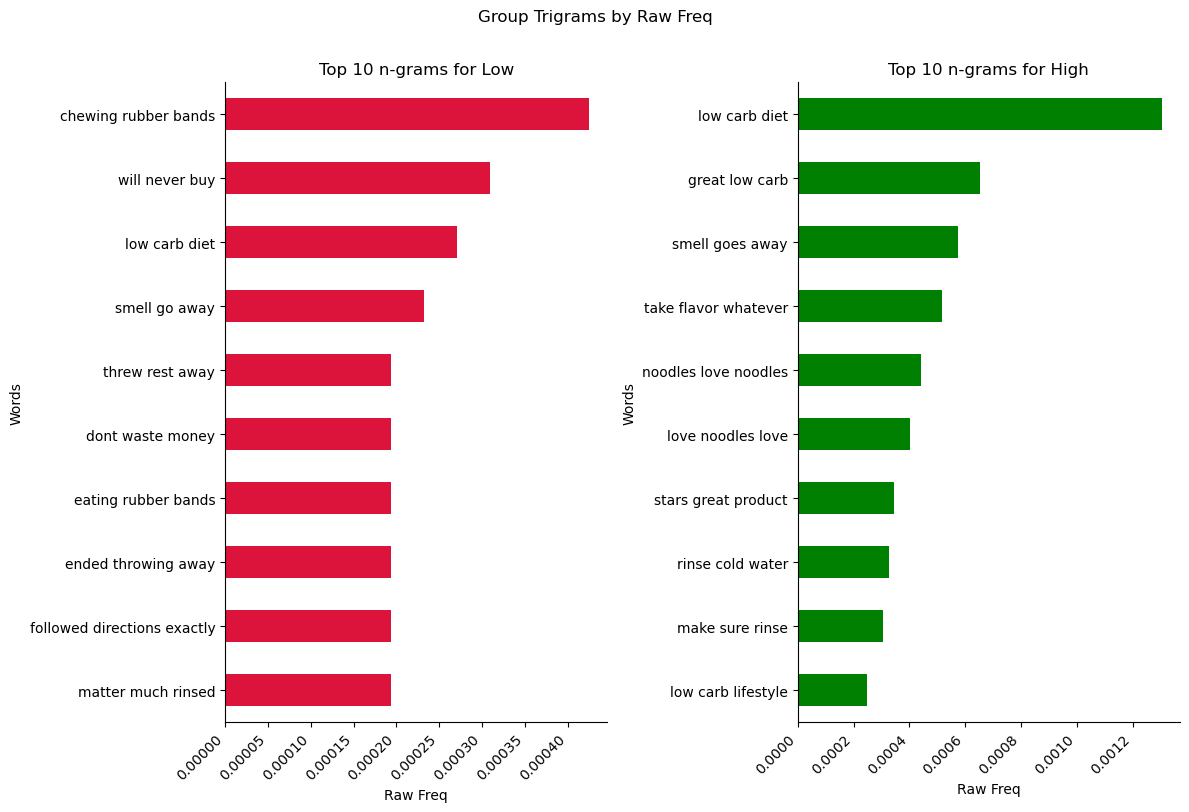

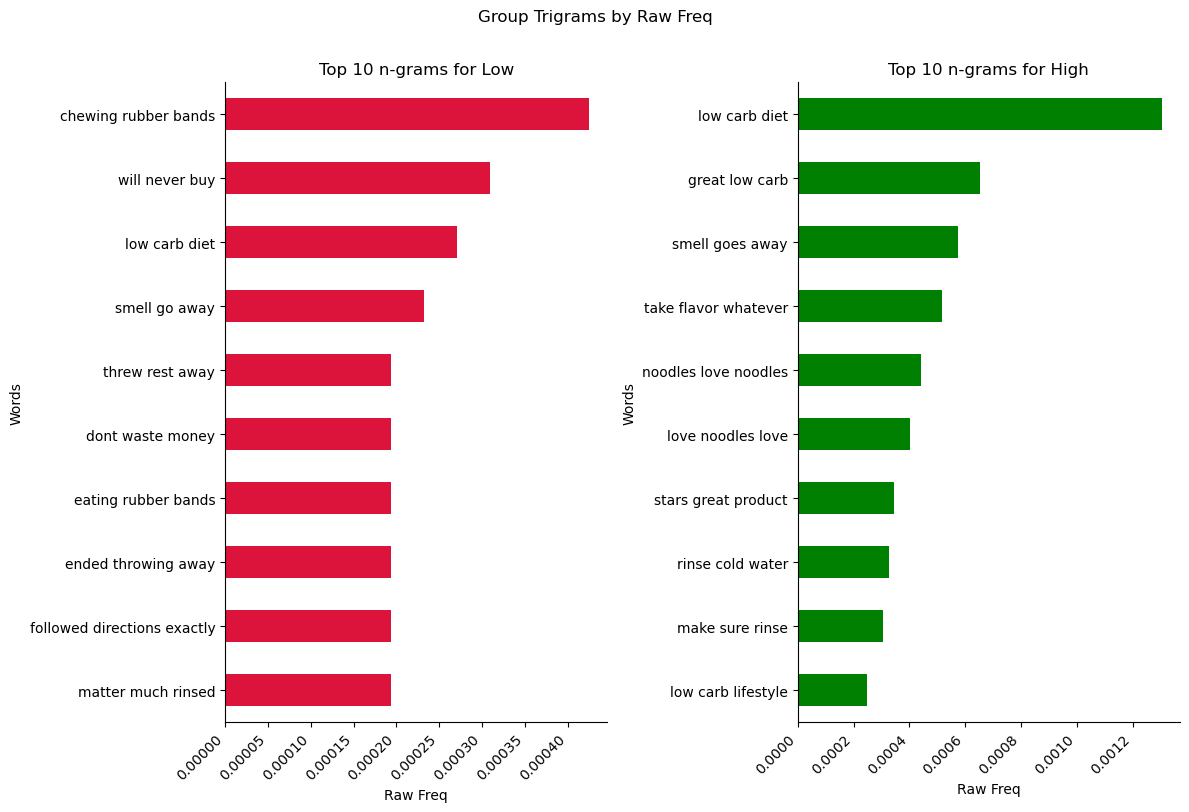

In [125]:
fn.plot_group_ngrams(ngrams_df,   group1_colname='Low', group2_colname="High", top_n=10)

In [121]:
FPATHS['readme']

{'histogram-reviews-dist_png': 'images/01_histogram_reviews.png',
 'avg-reviews-by-year_png': 'images/02_avg_rating_by_year.png',
 'number-reviews-stars-by-year_png': 'images/03_count_stars_by_year.png',
 'ngrams-by-group_png': 'images/04_ngrams_by_group.png',
 'wordclouds-by-group_png': 'images/05_wordclouds.png'}

In [122]:
fname_ngram = FPATHS['readme']['ngrams-by-group_png']
# pfig#.#to_image()
with open(fname_ngram,'wb') as f:
    f.write(pfig.to_image('png'))

# Modeling App


### Prep

- Decide best models
- Save best models (FPATHS keys) as a var somewhere
- Use new evaluation function to save the classification report and confusion matrices.
- in app, load the string and image to display

In [123]:
best_ml_model = FPATHS['models']['ml']['logreg_joblib']
best_ml_clf = joblib.load(best_ml_model)
best_ml_clf

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('clf', LogisticRegression(C=1000000000000.0, max_iter=500))])

### APP

In [124]:
import json
with open('config/filepaths.json') as f:
    FPATHS = json.load(f)
FPATHS['models']

{'ml': {'bayes_joblib': 'models/bayes-clf.joblib',
  'random_forest_joblib': 'models/random-forest.joblib',
  'logreg_joblib': 'models/log-reg.joblib'},
 'nn': {'LSTM_dir': 'models/keras/lstm/',
  'GRU_dir': 'models/keras/gru/',
  'Attention_model_dir': 'models/keras/attn/'}}

In [125]:
"""App for NLP Models for Streamlit Lesson"""
import streamlit as st
import streamlit.components.v1 as components
import pandas as pd
import numpy as np
import os
import joblib
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import json

with open('config/filepaths.json') as f:
    FPATHS = json.load(f)

st.title("Predicting Yelp Review Classifications")
st.header("Get Predictions")

# Get text to predict from the text input box
X_to_pred = st.text_input("### Enter text to predict here:", 
                          value="I've tried many low carb noodles over the years and I have to say that I was shocked with how bad these miracle noodles were!.")

In [126]:
X_to_pred

"I've tried many low carb noodles over the years and I have to say that I was shocked with how bad these miracle noodles were!."

In [127]:
# Loading the ML model
# @st.cache_resource
def load_ml_model(fpath):
    loaded_model = joblib.load(fpath)
    return loaded_model

In [128]:
best_ml_model = FPATHS['models']['ml']['logreg_joblib']
best_ml_clf = joblib.load(best_ml_model)
best_ml_clf

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('clf', LogisticRegression(C=1000000000000.0, max_iter=500))])

In [129]:
# Load encoder and make lookup dict
encoder_fpath = FPATHS['metadata']['label_encoder_joblib']
@st.cache_data
def load_target_lookup(encoder_fpath = FPATHS['metadata']['label_encoder_joblib']):
    # Load encoder and make lookup dict
    encoder = joblib.load(encoder_fpath)

    lookup_dict = {i:class_ for i,class_ in enumerate(encoder.classes_)}
    return encoder, lookup_dict


encoder, target_lookup = load_target_lookup()

2024-02-12 22:06:05.193 No runtime found, using MemoryCacheStorageManager
2024-02-12 22:06:05.195 No runtime found, using MemoryCacheStorageManager


In [130]:
## Loading our training and test data
@st.cache_data
def load_Xy_data(joblib_fpath):
    return joblib.load(joblib_fpath)

X_train, y_train = load_Xy_data(FPATHS['data']['ml-nlp']['train_joblib'])
X_test, y_test = load_Xy_data(FPATHS['data']['ml-nlp']['test_joblib'])

2024-02-12 22:06:05.241 No runtime found, using MemoryCacheStorageManager
2024-02-12 22:06:05.242 No runtime found, using MemoryCacheStorageManager


In [131]:

def classification_metrics_streamlit(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False,values_format=".2f"):
    """Modified version of classification metrics function from Intro to Machine Learning.
    Updates:
    - Reversed raw counts confusion matrix cmap  (so darker==more).
    - Added arg for normalized confusion matrix values_format
    """
    # Get the classification report
    report = classification_report(y_true, y_pred)
    
    ## Save header and report
    header = "-"*70
    final_report = "\n".join([header,f" Classification Metrics: {label}", header,report,"\n"])
    
    
    ## CONFUSION MATRICES SUBPLOTS
    fig, axes = plt.subplots(ncols=2, figsize=figsize)
    
    # Create a confusion matrix  of raw counts (left subplot)
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                            normalize=None, 
                                            cmap='gist_gray_r',# Updated cmap
                                            values_format="d", 
                                            colorbar=colorbar,
                                            ax = axes[0]);
    axes[0].set_title("Raw Counts")
    
    # Create a confusion matrix with the data with normalize argument 
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                            normalize=normalize,
                                            cmap=cmap, 
                                            values_format=values_format, #New arg
                                            colorbar=colorbar,
                                            ax = axes[1]);
    axes[1].set_title("Normalized Confusion Matrix")
    
    # Adjust layout and show figure
    fig.tight_layout()

    return final_report, fig


In [132]:
# best_ml_clf.get_params()
display(best_ml_clf)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('clf', LogisticRegression(C=1000000000000.0, max_iter=500))])

In [133]:
def evaluate_classification_streamlit(model, X_train, y_train, X_test, y_test,
                                     joblib_fpath, cmap_train="Blues",cmap_test="Reds"):
    ## Save ML Model Results
    y_hat_train = model.predict(X_train)
    report_train, fig_train = classification_metrics_streamlit(y_train, y_hat_train, cmap=cmap_train,
                                                            label="Training Data")
    print(report_train)
    plt.show()
    y_hat_test = model.predict(X_test)
    report_test, fig_test = classification_metrics_streamlit(y_test, y_hat_test,cmap=cmap_test,
                                                             label="Test Data")
    print(report_test)
    plt.show()


    results_dict = {
        "model": model,
        "train": {"classification_report": report_train, "confusion_matrix": fig_train},
        "test": {"classification_report": report_test, "confusion_matrix": fig_test},
    }
    
    joblib.dump(results_dict, joblib_fpath, compress=9)
    print(f"- Succesfully saved model to {joblib_fpath}.")
    return results_dict

In [134]:
fpath_best_ml = FPATHS['results']['best-ml-clf_joblib']
fpath_best_ml

'models/best-ml-clf.joblib'

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1376
           1       1.00      1.00      1.00      1102

    accuracy                           1.00      2478
   macro avg       1.00      1.00      1.00      2478
weighted avg       1.00      1.00      1.00      2478





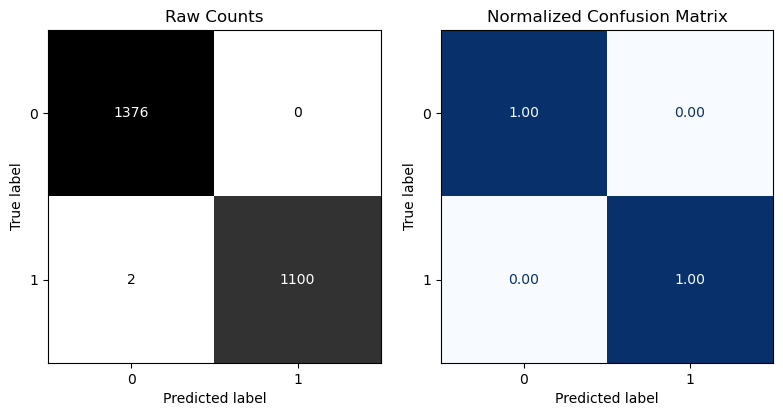

----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       492
           1       0.92      0.94      0.93       335

    accuracy                           0.94       827
   macro avg       0.94      0.94      0.94       827
weighted avg       0.94      0.94      0.94       827





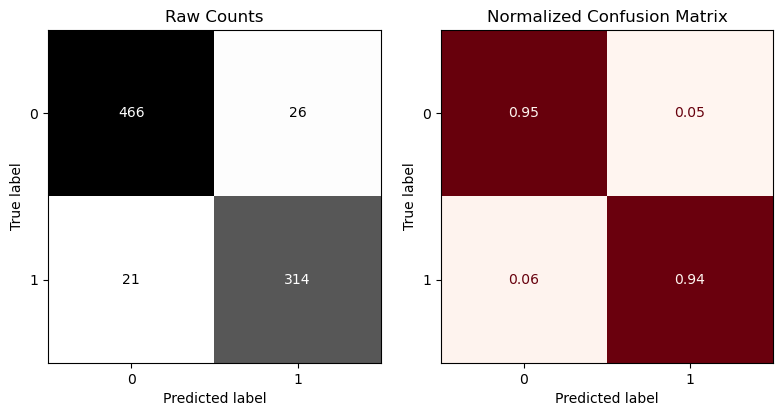

- Succesfully saved model to models/best-ml-clf.joblib.


In [135]:
results = evaluate_classification_streamlit(best_ml_clf, X_train,y_train, X_test,y_test,
                                           joblib_fpath=fpath_best_ml)

In [146]:
def get_coeffs_logreg(logreg, feature_names = None, sort=True,ascending=True,
                      name='LogReg Coefficients', class_index=0):
    if feature_names is None:
        feature_names = logreg.feature_names_in_ 
    
    ## Saving the coefficients
    coeffs = pd.Series(logreg.coef_[class_index],
                       index= feature_names, name=name)
    
    # use .loc to add the intercept to the series
    coeffs.loc['intercept'] = logreg.intercept_[class_index]
    if sort == True:
        coeffs = coeffs.sort_values(ascending=ascending)  
    return coeffs



def plot_coeffs_color(coeffs, top_n=None,  figsize=(8,6), legend_loc='best',
                      threshold=None, color_lt='darkred', color_gt='forestgreen',
                      color_else='gray', label_thresh='Equally Likely',
                      label_gt='More Likely', label_lt='Less Likely',
                   plot_kws = {}):
    """Plots series of coefficients
        Args:
        ceoffs (pands Series): importance values to plot
        top_n (int): The # of features to display (Default=None).
                         If None, display all.
                        otherwise display top_n most important
                        
        figsize (tuple): figsize tuple for .plot
        color_dict (dict): dict with index values as keys with color to use as vals
                            Uses series.index.map(color_dict).
        plot_kws (dict): additional keyword args accepted by panda's .plot
        
         
         Returns:
        Axis: matplotlib axis
    """
    # sorting with asc=false for correct order of bars
    if top_n is None:
        ## sort all features and set title
        plot_vals = coeffs.sort_values()
        title = "All Coefficients"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        ## sort features and keep top_n and set title
        title = f"Top {top_n} Largest Coefficients"
        ## plotting top N importances
    if threshold is not None:
        color_dict = get_colors_gt_lt(plot_vals, threshold=threshold,
                                      color_gt=color_gt,color_lt=color_lt,
                                      color_else=color_else)
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        plot_kws.update({'color':colors})
    
    
    ax = plot_vals.plot(kind='barh', figsize=figsize,**plot_kws)
    ax.set(xlabel='Coefficient',
            ylabel='Feature Names',
            title=title)
    
    if threshold is not None:
        ln1 = ax.axvline(threshold,ls=':',color='black')
        from matplotlib.patches import Patch
        box_lt = Patch(color=color_lt)
        box_gt = Patch(color=color_gt)
        handles = [ln1,box_gt,box_lt]
        labels = [label_thresh,label_gt,label_lt]
        ax.legend(handles,labels, loc=legend_loc)
    ## return ax in case want to continue to update/modify figure
    return ax


def get_colors_gt_lt(coeffs, threshold=1, color_lt ='darkred',
                     color_gt='forestgreen', color_else='gray'):
    """Creates a dictionary of features:colors based on if value is > or < threshold"""
    colors_dict = {}
    for i in coeffs.index:
        rounded_coeff = np.round( coeffs.loc[i],3)
        if rounded_coeff < threshold:
            color = color_lt
        elif rounded_coeff > threshold:
            color = color_gt
        else:
            color=color_else
        colors_dict[i] = color
    return colors_dict



In [141]:
!pip install -U dojo_ds -q 
import dojo_ds as ds
ds.__version__

In [158]:
# best_ml_model = FPATHS['models']['ml']['logreg_joblib']
# best_ml_clf = joblib.load(best_ml_model)
best_ml_clf

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('clf', LogisticRegression(C=1000000000000.0, max_iter=500))])

In [161]:
X_train_tf = best_ml_clf[0].transform(X_train)
X_test_tf = best_ml_clf[0].transform(X_test)
X_train_tf

<2478x39722 sparse matrix of type '<class 'numpy.float64'>'
	with 98561 stored elements in Compressed Sparse Row format>

In [168]:
# ## Calculate permutation importance
# from sklearn.inspection import permutation_importance

# r = permutation_importance(best_ml_clf[-1],X_test_tf.toarray(),
#                            y_test,n_repeats=3,scoring='recall_macro')

# ## Make a series
# perm_importance = pd.Series(r['importances_mean'],index=best_ml_clf.get_feature_names_out(),
#                            name = 'permutation importance').sort_values(ascending=True)
# perm_importance.tail(5).plot(kind='barh')

In [1]:
# # 
# ds.insights.plot_im

In [2]:
# coeffs = ds.insights.get_coeffs_logreg(best_ml_clf[-1], feature_names=best_ml_clf[0].get_feature_names_out(),
#                           class_index=0)
# ax = plot_coeffs_color(coeffs, top_n=20, threshold=0)

In [3]:
# ## Plot top 20 ranked coefficients (ranked by abs value, but plot +/-)
# coeffs = get_coeffs_logreg(best_ml_clf[-1], feature_names=best_ml_clf[0].get_feature_names_out(),
#                           class_index=0,)
# ax = plot_coeffs_color(coeffs, top_n=20, threshold=0)
# ax.axvline(0, color='k');
# ax.set_title('Top 20 Largest Coefficients - 5 Star Reviews');

In [4]:
# stop here

In [5]:
# @st.cache_resource
# def load_best_model_results(fpath_results_joblib):
#     import joblib
#     return joblib.load(fpath_results_joblib)

In [ ]:
# ## Save ML Model Results
# y_hat_train = best_ml_clf.predict(X_train)
# report_train, fig_train = classification_metrics_streamlit(y_train, y_hat_train)

# y_hat_test = best_ml_clf.predict(X_test)
# report_test, fig_test = classification_metrics_streamlit(y_test, y_hat_test,cmap="Reds")

In [ ]:
# results_dict = {
#     "model": best_ml_clf,
#     "train": {"classification_report": report_train, "confusion_matrix": fig_train},
#     "test": {"classification_report": report_test, "confusion_matrix": fig_test},
# }

# joblib.dump(results_dict, fpath_best_ml, compress=9)


In [6]:
# # Define functions for predictions
# lookup_dict = {1:'One Star', 5:'Five Stars'}

def predict_decode(X_to_pred, clf_pipe,lookup_dict):
    
    if isinstance(X_to_pred, str):
        X = [X_to_pred]
    else:
        X = X_to_pred

    # Get Predixtion
    pred_class = clf_pipe.predict(X)[0]
    
    # In case the predicted class is missing from the lookup dict
    try:
        # Decode label
        class_name = lookup_dict[pred_class]
    except:
        class_name = pred_class
    return class_name

In [ ]:
# target_lookup = load_target_lookup()
# target_lookup

In [ ]:
## Lime Explanation Fucntions
from lime.lime_text import LimeTextExplainer
@st.cache_resource
def get_explainer(class_names = None):
	lime_explainer = LimeTextExplainer(class_names=class_names)
	return lime_explainer

def explain_instance(explainer, X_to_pred,predict_func):
	explanation = explainer.explain_instance(X_to_pred, predict_func, labels=(1,))
	return explanation.as_html(predict_proba=False)

# @st.cache_data
# def load_target_lookup(encoder_fpath = FPATHS['metadata']['label_encoder_joblib']):
#     # Load encoder and make lookup dict
#     encoder = joblib.load(encoder_fpath)

#     lookup_dict = {i:class_ for i,class_ in enumerate(encoder.classes_)}
#     return lookup_dict



In [ ]:
X_to_pred

In [ ]:
pred = predict_decode(X_to_pred, best_ml_clf,lookup_dict=target_lookup,)
pred

In [ ]:
encoder.classes_

In [ ]:
best_ml_clf.predict([X_to_pred])

In [ ]:
from IPython.display import HTML
explainer = get_explainer(class_names=encoder.classes_)
# explanation_ml = explainer.explain_instance(X_to_pred, best_ml_clf.predict_proba)
explanation_ml = explain_instance(explainer,X_to_pred, best_ml_clf.predict_proba)


# explanation_ml = explain_instance(explainer, X_to_pred, best_ml_clf.predict_proba )#lime_explainer.explain_instance(X_to_pred, best_ml_clf.predict_proba,labels=label_index_ml)
HTML(explanation_ml)

In [ ]:
col1,col2,col3 = st.columns(3)
show_train = col1.checkbox("Show training data.", value=True)
show_test = col2.checkbox("Show test data.", value=True)
show_model_params =col3.checkbox("Show model params.", value=False)

# show_train = st.checkbox("Show training data.", value=True)
# show_test = st.checkbox("Show test data.",value=True)
# show_model_params =st.checkbox("Show model params.", value=False)

# st.subheader("Machine Learning Model")
if st.button("Show model evaluation."):
    with st.spinner("Loading model results..."):
        results = load_best_model_results(FPATHS['results']['best-ml-clf_joblib'])
        
    if show_train == True:
        # y_pred_train = clf_bayes_pipe.predict(X_train)
        # report_str, conf_mat = classification_metrics_streamlit(y_train, y_pred_train, label='Training Data')
        st.text(results['train']['classification_report'])
        st.pyplot(results['train']['confusion_matrix'])
        st.text("\n\n")


    if show_test == True: 
        # y_pred_test = clf_bayes_pipe.predict(X_test)
        # report_str, conf_mat = classification_metrics_streamlit(y_test, y_pred_test, cmap='Reds',label='Test Data')
        st.text(results['test']['classification_report'])
        st.pyplot(results['test']['confusion_matrix'])
        st.text("\n\n")

    if show_model_params:
        st.markdown("####  Model Parameters:")
        st.write(resuts['model'].get_params())

else:
    st.empty()

### SImple Chat GPT

In [ ]:
raise Exception ("ChatBot Dev Moved to Ntebook Part-05B_StreamlitDev-LangChain")

In [ ]:
flavor_options = {
    "Summary(General)": {'prompt':"You are a helpful assistant data scientist who uses ngrams from product reviews to summarize that customers do and do not like.",
                         'placeholder': ""},
    "Summary(Recommendations)": {'prompt':"You are a helpful assistant data scientist who uses ngrams from product reviews to provide actionable recommendations for how to improve the product.",
                                 'placeholder':''},
    "Customer (Low Carb/Gluten Free)": {'prompt':"You are a typical consumer who follows a low carb diet and has gluten sensitivity. You know what things you like in your food products.",
                                        "placeholder":''},
    "Customer (General)":  {'prompt':"You are a typical consumer who does not follow a special diet and enjoys eating gluten-containing foods. You know what things you like in your food products.",
                            "placeholder":""},
}

In [ ]:
@st.cache_resource
def load_chatgpt(temp,flavor_name):
    top_n_group_ngrams = fn.show_ngrams(df, top_n=25,ngrams=4, text_col_selection='review-text-full',
                                     stopwords_list=chatgpt_stopwords)
    md_table = format_ngrams_for_chat(top_n_group_ngrams)
    table_message = f"Heres a table of the most common ngrams from Low Rating reviews and high rating reviews. ```{md_table}```" 
    
    # Clear message history and specify flavor
    st.session_state.session_messages = [
    SystemMessage(content=flavor_options[flavor_name]['prompt']),
    SystemMessage(content=table_message)
    ]
    return  ChatOpenAI(temperature=temp)
     

In [ ]:
flavor_name = col1.selectbox("Which type of chatbot?", key='flavor',options=list(flavor_options.keys()), index=0,on_change=set_placeholder())



In [ ]:
def set_placeholder():
    text = flavor_options[flavor_name]['placeholder']
    st.session.placeholder = text
    get_text()
    # st.session_state.text = st.session_state.text.upper()


def get_text():
    input_text = st.text_area("You: ", key='input', value =st.session_state.placeholder)#"Please give me a summary of what customers liked  and did not like about this product.")
    return input_text


st.text_area("Enter text", key="text")
st.button("Upper Text", on_click=on_upper_clicked)
